# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 57703 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all)


  0% (    1 of 57703) |           | Elapsed Time: 0:00:03 ETA:  2 days, 14:09:48

  0% (  127 of 57703) |                    | Elapsed Time: 0:00:04 ETA:  0:07:35

  0% (  243 of 57703) |                    | Elapsed Time: 0:00:05 ETA:  0:07:52

  0% (  351 of 57703) |                    | Elapsed Time: 0:00:06 ETA:  0:08:09

  0% (  460 of 57703) |                    | Elapsed Time: 0:00:07 ETA:  0:08:16

  0% (  569 of 57703) |                    | Elapsed Time: 0:00:08 ETA:  0:08:20

  1% (  651 of 57703) |                    | Elapsed Time: 0:00:09 ETA:  0:08:44

  1% (  722 of 57703) |                    | Elapsed Time: 0:00:10 ETA:  0:08:42

  1% (  834 of 57703) |                    | Elapsed Time: 0:00:11 ETA:  0:08:39

  1% (  951 of 57703) |                    | Elapsed Time: 0:00:12 ETA:  0:08:33

  1% ( 1065 of 57703) |                    | Elapsed Time: 0:00:13 ETA:  0:08:39

  2% ( 1179 of 57703) |                    | Elapsed Time: 0:00:14 ETA:  0:08:39

  2% ( 1289 of 57703) |                    | Elapsed Time: 0:00:15 ETA:  0:08:37

  2% ( 1399 of 57703) |                    | Elapsed Time: 0:00:16 ETA:  0:08:36

  2% ( 1443 of 57703) |                    | Elapsed Time: 0:00:16 ETA:  0:08:36

  2% ( 1557 of 57703) |                    | Elapsed Time: 0:00:17 ETA:  0:08:16

  2% ( 1652 of 57703) |                    | Elapsed Time: 0:00:18 ETA:  0:08:25

  3% ( 1766 of 57703) |                    | Elapsed Time: 0:00:19 ETA:  0:08:23

  3% ( 1873 of 57703) |                    | Elapsed Time: 0:00:20 ETA:  0:08:28

  3% ( 1983 of 57703) |                    | Elapsed Time: 0:00:22 ETA:  0:08:29

  3% ( 2096 of 57703) |                    | Elapsed Time: 0:00:23 ETA:  0:08:29

  3% ( 2164 of 57703) |                    | Elapsed Time: 0:00:23 ETA:  0:08:38

  3% ( 2252 of 57703) |                    | Elapsed Time: 0:00:24 ETA:  0:08:52

  4% ( 2346 of 57703) |                    | Elapsed Time: 0:00:25 ETA:  0:08:58

  4% ( 2438 of 57703) |                    | Elapsed Time: 0:00:26 ETA:  0:09:11

  4% ( 2542 of 57703) |                    | Elapsed Time: 0:00:27 ETA:  0:09:04

  4% ( 2646 of 57703) |                    | Elapsed Time: 0:00:28 ETA:  0:09:09

  4% ( 2724 of 57703) |                    | Elapsed Time: 0:00:29 ETA:  0:09:28

  4% ( 2845 of 57703) |                    | Elapsed Time: 0:00:30 ETA:  0:09:19

  5% ( 2886 of 57703) |#                   | Elapsed Time: 0:00:31 ETA:  0:09:24

  5% ( 3010 of 57703) |#                   | Elapsed Time: 0:00:32 ETA:  0:08:59

  5% ( 3136 of 57703) |#                   | Elapsed Time: 0:00:33 ETA:  0:08:33

  5% ( 3262 of 57703) |#                   | Elapsed Time: 0:00:34 ETA:  0:08:13

  5% ( 3385 of 57703) |#                   | Elapsed Time: 0:00:35 ETA:  0:07:54

  6% ( 3508 of 57703) |#                   | Elapsed Time: 0:00:36 ETA:  0:07:43

  6% ( 3607 of 57703) |#                   | Elapsed Time: 0:00:36 ETA:  0:07:32

  6% ( 3732 of 57703) |#                   | Elapsed Time: 0:00:37 ETA:  0:07:08

  6% ( 3857 of 57703) |#                   | Elapsed Time: 0:00:38 ETA:  0:07:06

  6% ( 3974 of 57703) |#                   | Elapsed Time: 0:00:39 ETA:  0:07:07

  7% ( 4080 of 57703) |#                   | Elapsed Time: 0:00:40 ETA:  0:07:14

  7% ( 4155 of 57703) |#                   | Elapsed Time: 0:00:41 ETA:  0:07:37

  7% ( 4265 of 57703) |#                   | Elapsed Time: 0:00:42 ETA:  0:07:44

  7% ( 4328 of 57703) |#                   | Elapsed Time: 0:00:43 ETA:  0:07:49

  7% ( 4438 of 57703) |#                   | Elapsed Time: 0:00:44 ETA:  0:07:55

  7% ( 4548 of 57703) |#                   | Elapsed Time: 0:00:45 ETA:  0:08:01

  8% ( 4658 of 57703) |#                   | Elapsed Time: 0:00:46 ETA:  0:08:08

  8% ( 4772 of 57703) |#                   | Elapsed Time: 0:00:47 ETA:  0:08:13

  8% ( 4881 of 57703) |#                   | Elapsed Time: 0:00:48 ETA:  0:08:18

  8% ( 4996 of 57703) |#                   | Elapsed Time: 0:00:49 ETA:  0:08:12

  8% ( 5050 of 57703) |#                   | Elapsed Time: 0:00:50 ETA:  0:07:50

  8% ( 5167 of 57703) |#                   | Elapsed Time: 0:00:51 ETA:  0:07:46

  9% ( 5254 of 57703) |#                   | Elapsed Time: 0:00:52 ETA:  0:08:20

  9% ( 5325 of 57703) |#                   | Elapsed Time: 0:00:53 ETA:  0:08:44

  9% ( 5396 of 57703) |#                   | Elapsed Time: 0:00:54 ETA:  0:09:10

  9% ( 5468 of 57703) |#                   | Elapsed Time: 0:00:55 ETA:  0:09:37

  9% ( 5543 of 57703) |#                   | Elapsed Time: 0:00:56 ETA:  0:10:08

  9% ( 5619 of 57703) |#                   | Elapsed Time: 0:00:57 ETA:  0:10:36

  9% ( 5708 of 57703) |#                   | Elapsed Time: 0:00:58 ETA:  0:11:01

 10% ( 5771 of 57703) |##                  | Elapsed Time: 0:00:59 ETA:  0:11:16

 10% ( 5851 of 57703) |##                  | Elapsed Time: 0:01:00 ETA:  0:11:54

 10% ( 5933 of 57703) |##                  | Elapsed Time: 0:01:01 ETA:  0:11:30

 10% ( 6023 of 57703) |##                  | Elapsed Time: 0:01:02 ETA:  0:11:09

 10% ( 6123 of 57703) |##                  | Elapsed Time: 0:01:03 ETA:  0:10:39

 10% ( 6241 of 57703) |##                  | Elapsed Time: 0:01:04 ETA:  0:09:56

 11% ( 6351 of 57703) |##                  | Elapsed Time: 0:01:05 ETA:  0:09:27

 11% ( 6450 of 57703) |##                  | Elapsed Time: 0:01:06 ETA:  0:09:08

 11% ( 6492 of 57703) |##                  | Elapsed Time: 0:01:06 ETA:  0:09:09

 11% ( 6585 of 57703) |##                  | Elapsed Time: 0:01:07 ETA:  0:09:00

 11% ( 6680 of 57703) |##                  | Elapsed Time: 0:01:08 ETA:  0:08:48

 11% ( 6772 of 57703) |##                  | Elapsed Time: 0:01:09 ETA:  0:08:40

 11% ( 6880 of 57703) |##                  | Elapsed Time: 0:01:10 ETA:  0:08:26

 12% ( 7005 of 57703) |##                  | Elapsed Time: 0:01:11 ETA:  0:08:09

 12% ( 7112 of 57703) |##                  | Elapsed Time: 0:01:12 ETA:  0:08:15

 12% ( 7213 of 57703) |##                  | Elapsed Time: 0:01:13 ETA:  0:08:14

 12% ( 7323 of 57703) |##                  | Elapsed Time: 0:01:14 ETA:  0:08:06

 12% ( 7433 of 57703) |##                  | Elapsed Time: 0:01:15 ETA:  0:07:53

 13% ( 7545 of 57703) |##                  | Elapsed Time: 0:01:16 ETA:  0:07:42

 13% ( 7657 of 57703) |##                  | Elapsed Time: 0:01:17 ETA:  0:07:31

 13% ( 7768 of 57703) |##                  | Elapsed Time: 0:01:18 ETA:  0:07:20

 13% ( 7880 of 57703) |##                  | Elapsed Time: 0:01:19 ETA:  0:07:17

 13% ( 7935 of 57703) |##                  | Elapsed Time: 0:01:20 ETA:  0:07:24

 13% ( 8047 of 57703) |##                  | Elapsed Time: 0:01:21 ETA:  0:07:20

 14% ( 8159 of 57703) |##                  | Elapsed Time: 0:01:22 ETA:  0:07:18

 14% ( 8270 of 57703) |##                  | Elapsed Time: 0:01:23 ETA:  0:07:17

 14% ( 8382 of 57703) |##                  | Elapsed Time: 0:01:24 ETA:  0:07:15

 14% ( 8438 of 57703) |##                  | Elapsed Time: 0:01:25 ETA:  0:07:46

 14% ( 8546 of 57703) |##                  | Elapsed Time: 0:01:26 ETA:  0:07:47

 15% ( 8656 of 57703) |###                 | Elapsed Time: 0:01:27 ETA:  0:07:45

 15% ( 8767 of 57703) |###                 | Elapsed Time: 0:01:28 ETA:  0:07:45

 15% ( 8878 of 57703) |###                 | Elapsed Time: 0:01:29 ETA:  0:07:42

 15% ( 8990 of 57703) |###                 | Elapsed Time: 0:01:30 ETA:  0:07:41

 15% ( 9096 of 57703) |###                 | Elapsed Time: 0:01:31 ETA:  0:07:43

 15% ( 9208 of 57703) |###                 | Elapsed Time: 0:01:32 ETA:  0:07:42

 16% ( 9328 of 57703) |###                 | Elapsed Time: 0:01:33 ETA:  0:07:36

 16% ( 9377 of 57703) |###                 | Elapsed Time: 0:01:33 ETA:  0:07:05

 16% ( 9494 of 57703) |###                 | Elapsed Time: 0:01:34 ETA:  0:06:59

 16% ( 9607 of 57703) |###                 | Elapsed Time: 0:01:35 ETA:  0:06:57

 16% ( 9721 of 57703) |###                 | Elapsed Time: 0:01:36 ETA:  0:06:55

 17% ( 9836 of 57703) |###                 | Elapsed Time: 0:01:37 ETA:  0:06:52

 17% ( 9952 of 57703) |###                 | Elapsed Time: 0:01:38 ETA:  0:06:48

 17% (10070 of 57703) |###                 | Elapsed Time: 0:01:39 ETA:  0:06:41

 17% (10099 of 57703) |###                 | Elapsed Time: 0:01:40 ETA:  0:06:38

 17% (10214 of 57703) |###                 | Elapsed Time: 0:01:41 ETA:  0:06:40

 17% (10327 of 57703) |###                 | Elapsed Time: 0:01:42 ETA:  0:06:40

 18% (10443 of 57703) |###                 | Elapsed Time: 0:01:43 ETA:  0:06:40

 18% (10558 of 57703) |###                 | Elapsed Time: 0:01:44 ETA:  0:06:38

 18% (10673 of 57703) |###                 | Elapsed Time: 0:01:45 ETA:  0:06:36

 18% (10788 of 57703) |###                 | Elapsed Time: 0:01:46 ETA:  0:06:36

 18% (10820 of 57703) |###                 | Elapsed Time: 0:01:46 ETA:  0:06:36

 18% (10935 of 57703) |###                 | Elapsed Time: 0:01:47 ETA:  0:06:37

 19% (11053 of 57703) |###                 | Elapsed Time: 0:01:48 ETA:  0:06:34

 19% (11170 of 57703) |###                 | Elapsed Time: 0:01:49 ETA:  0:06:32

 19% (11289 of 57703) |###                 | Elapsed Time: 0:01:50 ETA:  0:06:28

 19% (11407 of 57703) |###                 | Elapsed Time: 0:01:51 ETA:  0:06:26

 20% (11541 of 57703) |####                | Elapsed Time: 0:01:52 ETA:  0:06:22

 20% (11660 of 57703) |####                | Elapsed Time: 0:01:53 ETA:  0:06:18

 20% (11779 of 57703) |####                | Elapsed Time: 0:01:54 ETA:  0:06:16

 20% (11901 of 57703) |####                | Elapsed Time: 0:01:55 ETA:  0:06:12

 20% (12024 of 57703) |####                | Elapsed Time: 0:01:56 ETA:  0:06:09

 21% (12144 of 57703) |####                | Elapsed Time: 0:01:57 ETA:  0:06:06

 21% (12262 of 57703) |####                | Elapsed Time: 0:01:58 ETA:  0:06:04

 21% (12383 of 57703) |####                | Elapsed Time: 0:01:59 ETA:  0:06:02

 21% (12497 of 57703) |####                | Elapsed Time: 0:02:01 ETA:  0:06:33

 21% (12611 of 57703) |####                | Elapsed Time: 0:02:02 ETA:  0:06:32

 22% (12729 of 57703) |####                | Elapsed Time: 0:02:03 ETA:  0:06:31

 22% (12846 of 57703) |####                | Elapsed Time: 0:02:04 ETA:  0:06:31

 22% (12958 of 57703) |####                | Elapsed Time: 0:02:05 ETA:  0:06:35

 22% (12984 of 57703) |####                | Elapsed Time: 0:02:05 ETA:  0:06:40

 22% (13082 of 57703) |####                | Elapsed Time: 0:02:06 ETA:  0:06:52

 22% (13173 of 57703) |####                | Elapsed Time: 0:02:07 ETA:  0:07:08

 22% (13262 of 57703) |####                | Elapsed Time: 0:02:08 ETA:  0:07:28

 23% (13347 of 57703) |####                | Elapsed Time: 0:02:09 ETA:  0:07:11

 23% (13432 of 57703) |####                | Elapsed Time: 0:02:10 ETA:  0:07:30

 23% (13517 of 57703) |####                | Elapsed Time: 0:02:11 ETA:  0:07:54

 23% (13609 of 57703) |####                | Elapsed Time: 0:02:12 ETA:  0:08:13

 23% (13705 of 57703) |####                | Elapsed Time: 0:02:13 ETA:  0:08:39

 23% (13795 of 57703) |####                | Elapsed Time: 0:02:14 ETA:  0:08:44

 24% (13879 of 57703) |####                | Elapsed Time: 0:02:15 ETA:  0:08:50

 24% (13993 of 57703) |####                | Elapsed Time: 0:02:16 ETA:  0:08:25

 24% (14107 of 57703) |####                | Elapsed Time: 0:02:17 ETA:  0:08:00

 24% (14220 of 57703) |####                | Elapsed Time: 0:02:18 ETA:  0:07:37

 24% (14333 of 57703) |####                | Elapsed Time: 0:02:19 ETA:  0:07:16

 25% (14426 of 57703) |#####               | Elapsed Time: 0:02:20 ETA:  0:07:02

 25% (14537 of 57703) |#####               | Elapsed Time: 0:02:21 ETA:  0:06:46

 25% (14644 of 57703) |#####               | Elapsed Time: 0:02:22 ETA:  0:06:43

 25% (14752 of 57703) |#####               | Elapsed Time: 0:02:23 ETA:  0:06:32

 25% (14863 of 57703) |#####               | Elapsed Time: 0:02:24 ETA:  0:06:16

 25% (14975 of 57703) |#####               | Elapsed Time: 0:02:25 ETA:  0:06:16

 26% (15084 of 57703) |#####               | Elapsed Time: 0:02:26 ETA:  0:06:17

 26% (15148 of 57703) |#####               | Elapsed Time: 0:02:26 ETA:  0:06:19

 26% (15260 of 57703) |#####               | Elapsed Time: 0:02:27 ETA:  0:06:19

 26% (15365 of 57703) |#####               | Elapsed Time: 0:02:28 ETA:  0:06:21

 26% (15469 of 57703) |#####               | Elapsed Time: 0:02:29 ETA:  0:06:24

 26% (15575 of 57703) |#####               | Elapsed Time: 0:02:30 ETA:  0:06:24

 27% (15674 of 57703) |#####               | Elapsed Time: 0:02:31 ETA:  0:06:28

 27% (15773 of 57703) |#####               | Elapsed Time: 0:02:32 ETA:  0:06:34

 27% (15869 of 57703) |#####               | Elapsed Time: 0:02:33 ETA:  0:06:42

 27% (15972 of 57703) |#####               | Elapsed Time: 0:02:34 ETA:  0:06:44

 27% (16076 of 57703) |#####               | Elapsed Time: 0:02:35 ETA:  0:06:45

 28% (16179 of 57703) |#####               | Elapsed Time: 0:02:36 ETA:  0:06:49

 28% (16272 of 57703) |#####               | Elapsed Time: 0:02:37 ETA:  0:06:55

 28% (16364 of 57703) |#####               | Elapsed Time: 0:02:38 ETA:  0:07:02

 28% (16455 of 57703) |#####               | Elapsed Time: 0:02:39 ETA:  0:07:11

 28% (16564 of 57703) |#####               | Elapsed Time: 0:02:40 ETA:  0:07:03

 28% (16590 of 57703) |#####               | Elapsed Time: 0:02:41 ETA:  0:07:00

 28% (16696 of 57703) |#####               | Elapsed Time: 0:02:42 ETA:  0:06:53

 29% (16800 of 57703) |#####               | Elapsed Time: 0:02:43 ETA:  0:06:52

 29% (16917 of 57703) |#####               | Elapsed Time: 0:02:44 ETA:  0:06:42

 29% (17032 of 57703) |#####               | Elapsed Time: 0:02:45 ETA:  0:06:33

 29% (17105 of 57703) |#####               | Elapsed Time: 0:02:46 ETA:  0:07:09

 29% (17217 of 57703) |#####               | Elapsed Time: 0:02:47 ETA:  0:06:54

 30% (17311 of 57703) |######              | Elapsed Time: 0:02:48 ETA:  0:06:39

 30% (17427 of 57703) |######              | Elapsed Time: 0:02:49 ETA:  0:06:33

 30% (17542 of 57703) |######              | Elapsed Time: 0:02:50 ETA:  0:06:26

 30% (17659 of 57703) |######              | Elapsed Time: 0:02:51 ETA:  0:06:19

 30% (17778 of 57703) |######              | Elapsed Time: 0:02:52 ETA:  0:06:09

 31% (17897 of 57703) |######              | Elapsed Time: 0:02:53 ETA:  0:06:07

 31% (18033 of 57703) |######              | Elapsed Time: 0:02:54 ETA:  0:05:21

 31% (18152 of 57703) |######              | Elapsed Time: 0:02:55 ETA:  0:05:16

 31% (18269 of 57703) |######              | Elapsed Time: 0:02:56 ETA:  0:05:15

 31% (18370 of 57703) |######              | Elapsed Time: 0:02:57 ETA:  0:05:22

 32% (18503 of 57703) |######              | Elapsed Time: 0:02:58 ETA:  0:05:12

 32% (18593 of 57703) |######              | Elapsed Time: 0:02:59 ETA:  0:05:25

 32% (18696 of 57703) |######              | Elapsed Time: 0:03:00 ETA:  0:05:33

 32% (18754 of 57703) |######              | Elapsed Time: 0:03:01 ETA:  0:05:42

 32% (18852 of 57703) |######              | Elapsed Time: 0:03:02 ETA:  0:05:53

 32% (18957 of 57703) |######              | Elapsed Time: 0:03:03 ETA:  0:05:55

 33% (19073 of 57703) |######              | Elapsed Time: 0:03:04 ETA:  0:05:56

 33% (19193 of 57703) |######              | Elapsed Time: 0:03:05 ETA:  0:05:53

 33% (19287 of 57703) |######              | Elapsed Time: 0:03:06 ETA:  0:05:56

 33% (19398 of 57703) |######              | Elapsed Time: 0:03:07 ETA:  0:06:08

 33% (19475 of 57703) |######              | Elapsed Time: 0:03:07 ETA:  0:05:55

 33% (19586 of 57703) |######              | Elapsed Time: 0:03:08 ETA:  0:05:49

 34% (19686 of 57703) |######              | Elapsed Time: 0:03:09 ETA:  0:05:50

 34% (19793 of 57703) |######              | Elapsed Time: 0:03:10 ETA:  0:05:43

 34% (19881 of 57703) |######              | Elapsed Time: 0:03:11 ETA:  0:05:52

 34% (19986 of 57703) |######              | Elapsed Time: 0:03:12 ETA:  0:05:58

 34% (20086 of 57703) |######              | Elapsed Time: 0:03:13 ETA:  0:06:09

 35% (20197 of 57703) |#######             | Elapsed Time: 0:03:14 ETA:  0:06:04

 35% (20319 of 57703) |#######             | Elapsed Time: 0:03:15 ETA:  0:05:54

 35% (20413 of 57703) |#######             | Elapsed Time: 0:03:16 ETA:  0:06:04

 35% (20521 of 57703) |#######             | Elapsed Time: 0:03:17 ETA:  0:05:58

 35% (20633 of 57703) |#######             | Elapsed Time: 0:03:18 ETA:  0:05:54

 35% (20736 of 57703) |#######             | Elapsed Time: 0:03:19 ETA:  0:05:43

 36% (20836 of 57703) |#######             | Elapsed Time: 0:03:20 ETA:  0:05:45

 36% (20918 of 57703) |#######             | Elapsed Time: 0:03:21 ETA:  0:05:39

 36% (21030 of 57703) |#######             | Elapsed Time: 0:03:22 ETA:  0:05:35

 36% (21147 of 57703) |#######             | Elapsed Time: 0:03:23 ETA:  0:05:29

 36% (21266 of 57703) |#######             | Elapsed Time: 0:03:24 ETA:  0:05:30

 37% (21386 of 57703) |#######             | Elapsed Time: 0:03:25 ETA:  0:05:15

 37% (21515 of 57703) |#######             | Elapsed Time: 0:03:26 ETA:  0:05:03

 37% (21639 of 57703) |#######             | Elapsed Time: 0:03:27 ETA:  0:04:54

 37% (21759 of 57703) |#######             | Elapsed Time: 0:03:28 ETA:  0:04:45

 37% (21846 of 57703) |#######             | Elapsed Time: 0:03:29 ETA:  0:04:51

 38% (21935 of 57703) |#######             | Elapsed Time: 0:03:30 ETA:  0:05:01

 38% (22030 of 57703) |#######             | Elapsed Time: 0:03:31 ETA:  0:05:08

 38% (22115 of 57703) |#######             | Elapsed Time: 0:03:32 ETA:  0:05:25

 38% (22203 of 57703) |#######             | Elapsed Time: 0:03:33 ETA:  0:05:42

 38% (22320 of 57703) |#######             | Elapsed Time: 0:03:34 ETA:  0:05:42

 38% (22360 of 57703) |#######             | Elapsed Time: 0:03:35 ETA:  0:06:04

 38% (22482 of 57703) |#######             | Elapsed Time: 0:03:36 ETA:  0:06:06

 39% (22576 of 57703) |#######             | Elapsed Time: 0:03:37 ETA:  0:06:23

 39% (22625 of 57703) |#######             | Elapsed Time: 0:03:38 ETA:  0:07:15

 39% (22715 of 57703) |#######             | Elapsed Time: 0:03:39 ETA:  0:07:13

 39% (22797 of 57703) |#######             | Elapsed Time: 0:03:40 ETA:  0:07:23

 39% (22907 of 57703) |#######             | Elapsed Time: 0:03:41 ETA:  0:07:01

 39% (23017 of 57703) |#######             | Elapsed Time: 0:03:42 ETA:  0:06:43

 40% (23082 of 57703) |########            | Elapsed Time: 0:03:43 ETA:  0:06:52

 40% (23206 of 57703) |########            | Elapsed Time: 0:03:44 ETA:  0:06:24

 40% (23329 of 57703) |########            | Elapsed Time: 0:03:45 ETA:  0:06:22

 40% (23427 of 57703) |########            | Elapsed Time: 0:03:46 ETA:  0:06:18

 40% (23520 of 57703) |########            | Elapsed Time: 0:03:47 ETA:  0:05:26

 40% (23599 of 57703) |########            | Elapsed Time: 0:03:48 ETA:  0:05:32

 41% (23678 of 57703) |########            | Elapsed Time: 0:03:49 ETA:  0:05:33

 41% (23764 of 57703) |########            | Elapsed Time: 0:03:50 ETA:  0:05:48

 41% (23803 of 57703) |########            | Elapsed Time: 0:03:50 ETA:  0:05:53

 41% (23928 of 57703) |########            | Elapsed Time: 0:03:51 ETA:  0:05:41

 41% (24037 of 57703) |########            | Elapsed Time: 0:03:52 ETA:  0:05:51

 41% (24155 of 57703) |########            | Elapsed Time: 0:03:53 ETA:  0:05:54

 42% (24262 of 57703) |########            | Elapsed Time: 0:03:54 ETA:  0:05:46

 42% (24382 of 57703) |########            | Elapsed Time: 0:03:55 ETA:  0:05:27

 42% (24484 of 57703) |########            | Elapsed Time: 0:03:56 ETA:  0:05:12

 42% (24524 of 57703) |########            | Elapsed Time: 0:03:57 ETA:  0:04:58

 42% (24620 of 57703) |########            | Elapsed Time: 0:03:58 ETA:  0:04:51

 42% (24727 of 57703) |########            | Elapsed Time: 0:03:59 ETA:  0:04:51

 43% (24847 of 57703) |########            | Elapsed Time: 0:04:00 ETA:  0:04:53

 43% (24966 of 57703) |########            | Elapsed Time: 0:04:01 ETA:  0:04:46

 43% (25081 of 57703) |########            | Elapsed Time: 0:04:02 ETA:  0:04:46

 43% (25199 of 57703) |########            | Elapsed Time: 0:04:03 ETA:  0:04:39

 43% (25246 of 57703) |########            | Elapsed Time: 0:04:03 ETA:  0:04:45

 43% (25348 of 57703) |########            | Elapsed Time: 0:04:04 ETA:  0:04:45

 44% (25454 of 57703) |########            | Elapsed Time: 0:04:05 ETA:  0:04:41

 44% (25559 of 57703) |########            | Elapsed Time: 0:04:06 ETA:  0:04:35

 44% (25653 of 57703) |########            | Elapsed Time: 0:04:07 ETA:  0:04:41

 44% (25750 of 57703) |########            | Elapsed Time: 0:04:08 ETA:  0:04:54

 44% (25859 of 57703) |########            | Elapsed Time: 0:04:09 ETA:  0:04:59

 45% (25967 of 57703) |#########           | Elapsed Time: 0:04:10 ETA:  0:05:02

 45% (26076 of 57703) |#########           | Elapsed Time: 0:04:11 ETA:  0:05:06

 45% (26180 of 57703) |#########           | Elapsed Time: 0:04:12 ETA:  0:05:06

 45% (26288 of 57703) |#########           | Elapsed Time: 0:04:13 ETA:  0:05:01

 45% (26387 of 57703) |#########           | Elapsed Time: 0:04:14 ETA:  0:05:05

 45% (26488 of 57703) |#########           | Elapsed Time: 0:04:15 ETA:  0:05:06

 46% (26589 of 57703) |#########           | Elapsed Time: 0:04:16 ETA:  0:05:00

 46% (26688 of 57703) |#########           | Elapsed Time: 0:04:17 ETA:  0:04:57

 46% (26806 of 57703) |#########           | Elapsed Time: 0:04:18 ETA:  0:04:50

 46% (26943 of 57703) |#########           | Elapsed Time: 0:04:19 ETA:  0:04:34

 46% (27068 of 57703) |#########           | Elapsed Time: 0:04:20 ETA:  0:04:24

 47% (27173 of 57703) |#########           | Elapsed Time: 0:04:21 ETA:  0:04:22

 47% (27264 of 57703) |#########           | Elapsed Time: 0:04:22 ETA:  0:04:30

 47% (27361 of 57703) |#########           | Elapsed Time: 0:04:23 ETA:  0:04:30

 47% (27409 of 57703) |#########           | Elapsed Time: 0:04:24 ETA:  0:04:28

 47% (27508 of 57703) |#########           | Elapsed Time: 0:04:25 ETA:  0:04:28

 47% (27634 of 57703) |#########           | Elapsed Time: 0:04:26 ETA:  0:04:14

 48% (27752 of 57703) |#########           | Elapsed Time: 0:04:27 ETA:  0:04:13

 48% (27871 of 57703) |#########           | Elapsed Time: 0:04:28 ETA:  0:04:22

 48% (28002 of 57703) |#########           | Elapsed Time: 0:04:29 ETA:  0:04:18

 48% (28131 of 57703) |#########           | Elapsed Time: 0:04:30 ETA:  0:04:03

 48% (28246 of 57703) |#########           | Elapsed Time: 0:04:31 ETA:  0:03:50

 49% (28349 of 57703) |#########           | Elapsed Time: 0:04:32 ETA:  0:03:45

 49% (28467 of 57703) |#########           | Elapsed Time: 0:04:33 ETA:  0:03:39

 49% (28586 of 57703) |#########           | Elapsed Time: 0:04:34 ETA:  0:03:29

 49% (28702 of 57703) |#########           | Elapsed Time: 0:04:35 ETA:  0:03:32

 49% (28818 of 57703) |#########           | Elapsed Time: 0:04:36 ETA:  0:03:32

 50% (28852 of 57703) |##########          | Elapsed Time: 0:04:36 ETA:  0:03:33

 50% (28957 of 57703) |##########          | Elapsed Time: 0:04:37 ETA:  0:03:46

 50% (29042 of 57703) |##########          | Elapsed Time: 0:04:38 ETA:  0:04:10

 50% (29130 of 57703) |##########          | Elapsed Time: 0:04:39 ETA:  0:04:25

 50% (29240 of 57703) |##########          | Elapsed Time: 0:04:40 ETA:  0:04:20

 50% (29251 of 57703) |##########          | Elapsed Time: 0:04:41 ETA:  0:05:45

 50% (29354 of 57703) |##########          | Elapsed Time: 0:04:42 ETA:  0:05:58

 51% (29473 of 57703) |##########          | Elapsed Time: 0:04:43 ETA:  0:05:54

 51% (29573 of 57703) |##########          | Elapsed Time: 0:04:44 ETA:  0:06:00

 51% (29672 of 57703) |##########          | Elapsed Time: 0:04:45 ETA:  0:05:58

 51% (29765 of 57703) |##########          | Elapsed Time: 0:04:46 ETA:  0:06:06

 51% (29882 of 57703) |##########          | Elapsed Time: 0:04:47 ETA:  0:05:40

 51% (29998 of 57703) |##########          | Elapsed Time: 0:04:48 ETA:  0:05:18

 52% (30105 of 57703) |##########          | Elapsed Time: 0:04:49 ETA:  0:05:20

 52% (30202 of 57703) |##########          | Elapsed Time: 0:04:50 ETA:  0:04:13

 52% (30295 of 57703) |##########          | Elapsed Time: 0:04:51 ETA:  0:04:05

 52% (30416 of 57703) |##########          | Elapsed Time: 0:04:52 ETA:  0:04:02

 52% (30539 of 57703) |##########          | Elapsed Time: 0:04:53 ETA:  0:03:53

 53% (30663 of 57703) |##########          | Elapsed Time: 0:04:54 ETA:  0:03:39

 53% (30782 of 57703) |##########          | Elapsed Time: 0:04:55 ETA:  0:03:24

 53% (30898 of 57703) |##########          | Elapsed Time: 0:04:56 ETA:  0:03:24

 53% (31016 of 57703) |##########          | Elapsed Time: 0:04:57 ETA:  0:03:16

 53% (31109 of 57703) |##########          | Elapsed Time: 0:04:58 ETA:  0:03:23

 54% (31179 of 57703) |##########          | Elapsed Time: 0:04:59 ETA:  0:03:35

 54% (31263 of 57703) |##########          | Elapsed Time: 0:05:00 ETA:  0:03:52

 54% (31365 of 57703) |##########          | Elapsed Time: 0:05:01 ETA:  0:04:01

 54% (31441 of 57703) |##########          | Elapsed Time: 0:05:02 ETA:  0:04:29

 54% (31499 of 57703) |##########          | Elapsed Time: 0:05:03 ETA:  0:05:13

 54% (31556 of 57703) |##########          | Elapsed Time: 0:05:04 ETA:  0:06:03

 54% (31624 of 57703) |##########          | Elapsed Time: 0:05:05 ETA:  0:06:46

 55% (31737 of 57703) |###########         | Elapsed Time: 0:05:06 ETA:  0:06:57

 55% (31841 of 57703) |###########         | Elapsed Time: 0:05:07 ETA:  0:06:45

 55% (31921 of 57703) |###########         | Elapsed Time: 0:05:08 ETA:  0:06:35

 55% (32004 of 57703) |###########         | Elapsed Time: 0:05:09 ETA:  0:06:35

 55% (32114 of 57703) |###########         | Elapsed Time: 0:05:10 ETA:  0:06:27

 55% (32225 of 57703) |###########         | Elapsed Time: 0:05:11 ETA:  0:05:55

 56% (32335 of 57703) |###########         | Elapsed Time: 0:05:12 ETA:  0:05:12

 56% (32438 of 57703) |###########         | Elapsed Time: 0:05:13 ETA:  0:04:38

 56% (32458 of 57703) |###########         | Elapsed Time: 0:05:13 ETA:  0:04:18

 56% (32573 of 57703) |###########         | Elapsed Time: 0:05:14 ETA:  0:04:16

 56% (32704 of 57703) |###########         | Elapsed Time: 0:05:15 ETA:  0:03:57

 56% (32839 of 57703) |###########         | Elapsed Time: 0:05:16 ETA:  0:03:22

 57% (32972 of 57703) |###########         | Elapsed Time: 0:05:17 ETA:  0:02:54

 57% (33084 of 57703) |###########         | Elapsed Time: 0:05:18 ETA:  0:02:52

 57% (33180 of 57703) |###########         | Elapsed Time: 0:05:19 ETA:  0:02:56

 57% (33288 of 57703) |###########         | Elapsed Time: 0:05:20 ETA:  0:02:56

 57% (33406 of 57703) |###########         | Elapsed Time: 0:05:21 ETA:  0:02:47

 58% (33521 of 57703) |###########         | Elapsed Time: 0:05:22 ETA:  0:02:45

 58% (33611 of 57703) |###########         | Elapsed Time: 0:05:23 ETA:  0:02:56

 58% (33734 of 57703) |###########         | Elapsed Time: 0:05:24 ETA:  0:02:59

 58% (33850 of 57703) |###########         | Elapsed Time: 0:05:25 ETA:  0:03:07

 58% (33901 of 57703) |###########         | Elapsed Time: 0:05:26 ETA:  0:03:19

 58% (34024 of 57703) |###########         | Elapsed Time: 0:05:27 ETA:  0:03:12

 59% (34148 of 57703) |###########         | Elapsed Time: 0:05:28 ETA:  0:02:58

 59% (34228 of 57703) |###########         | Elapsed Time: 0:05:29 ETA:  0:03:12

 59% (34351 of 57703) |###########         | Elapsed Time: 0:05:30 ETA:  0:03:09

 59% (34448 of 57703) |###########         | Elapsed Time: 0:05:31 ETA:  0:03:18

 59% (34563 of 57703) |###########         | Elapsed Time: 0:05:32 ETA:  0:03:03

 60% (34622 of 57703) |############        | Elapsed Time: 0:05:32 ETA:  0:03:08

 60% (34744 of 57703) |############        | Elapsed Time: 0:05:33 ETA:  0:03:03

 60% (34829 of 57703) |############        | Elapsed Time: 0:05:34 ETA:  0:03:16

 60% (34908 of 57703) |############        | Elapsed Time: 0:05:35 ETA:  0:03:42

 60% (35015 of 57703) |############        | Elapsed Time: 0:05:36 ETA:  0:03:53

 60% (35114 of 57703) |############        | Elapsed Time: 0:05:37 ETA:  0:03:40

 61% (35213 of 57703) |############        | Elapsed Time: 0:05:38 ETA:  0:03:54

 61% (35344 of 57703) |############        | Elapsed Time: 0:05:39 ETA:  0:03:50

 61% (35463 of 57703) |############        | Elapsed Time: 0:05:40 ETA:  0:03:42

 61% (35573 of 57703) |############        | Elapsed Time: 0:05:41 ETA:  0:03:49

 61% (35687 of 57703) |############        | Elapsed Time: 0:05:42 ETA:  0:03:29

 62% (35786 of 57703) |############        | Elapsed Time: 0:05:43 ETA:  0:03:15

 62% (35902 of 57703) |############        | Elapsed Time: 0:05:44 ETA:  0:03:09

 62% (36013 of 57703) |############        | Elapsed Time: 0:05:45 ETA:  0:03:00

 62% (36065 of 57703) |############        | Elapsed Time: 0:05:46 ETA:  0:02:49

 62% (36182 of 57703) |############        | Elapsed Time: 0:05:47 ETA:  0:02:46

 62% (36289 of 57703) |############        | Elapsed Time: 0:05:48 ETA:  0:02:48

 63% (36386 of 57703) |############        | Elapsed Time: 0:05:49 ETA:  0:02:59

 63% (36470 of 57703) |############        | Elapsed Time: 0:05:50 ETA:  0:03:14

 63% (36519 of 57703) |############        | Elapsed Time: 0:05:51 ETA:  0:03:56

 63% (36625 of 57703) |############        | Elapsed Time: 0:05:52 ETA:  0:03:49

 63% (36717 of 57703) |############        | Elapsed Time: 0:05:53 ETA:  0:04:05

 63% (36786 of 57703) |############        | Elapsed Time: 0:05:54 ETA:  0:04:15

 63% (36909 of 57703) |############        | Elapsed Time: 0:05:55 ETA:  0:04:02

 64% (37021 of 57703) |############        | Elapsed Time: 0:05:56 ETA:  0:04:04

 64% (37117 of 57703) |############        | Elapsed Time: 0:05:57 ETA:  0:04:12

 64% (37220 of 57703) |############        | Elapsed Time: 0:05:58 ETA:  0:04:06

 64% (37334 of 57703) |############        | Elapsed Time: 0:05:59 ETA:  0:03:44

 64% (37402 of 57703) |############        | Elapsed Time: 0:06:00 ETA:  0:04:29

 65% (37507 of 57703) |#############       | Elapsed Time: 0:06:01 ETA:  0:04:21

 65% (37622 of 57703) |#############       | Elapsed Time: 0:06:02 ETA:  0:04:04

 65% (37744 of 57703) |#############       | Elapsed Time: 0:06:03 ETA:  0:03:48

 65% (37867 of 57703) |#############       | Elapsed Time: 0:06:04 ETA:  0:03:47

 65% (37975 of 57703) |#############       | Elapsed Time: 0:06:05 ETA:  0:03:48

 65% (38080 of 57703) |#############       | Elapsed Time: 0:06:06 ETA:  0:03:42

 66% (38174 of 57703) |#############       | Elapsed Time: 0:06:07 ETA:  0:03:46

 66% (38229 of 57703) |#############       | Elapsed Time: 0:06:08 ETA:  0:03:51

 66% (38326 of 57703) |#############       | Elapsed Time: 0:06:09 ETA:  0:02:35

 66% (38443 of 57703) |#############       | Elapsed Time: 0:06:10 ETA:  0:02:34

 66% (38564 of 57703) |#############       | Elapsed Time: 0:06:11 ETA:  0:02:29

 67% (38688 of 57703) |#############       | Elapsed Time: 0:06:12 ETA:  0:02:27

 67% (38805 of 57703) |#############       | Elapsed Time: 0:06:13 ETA:  0:02:30

 67% (38906 of 57703) |#############       | Elapsed Time: 0:06:14 ETA:  0:02:33

 67% (38950 of 57703) |#############       | Elapsed Time: 0:06:14 ETA:  0:02:33

 67% (39049 of 57703) |#############       | Elapsed Time: 0:06:15 ETA:  0:02:29

 67% (39134 of 57703) |#############       | Elapsed Time: 0:06:16 ETA:  0:02:44

 68% (39251 of 57703) |#############       | Elapsed Time: 0:06:17 ETA:  0:02:31

 68% (39369 of 57703) |#############       | Elapsed Time: 0:06:18 ETA:  0:02:30

 68% (39476 of 57703) |#############       | Elapsed Time: 0:06:19 ETA:  0:02:38

 68% (39578 of 57703) |#############       | Elapsed Time: 0:06:20 ETA:  0:02:50

 68% (39671 of 57703) |#############       | Elapsed Time: 0:06:21 ETA:  0:03:03

 68% (39793 of 57703) |#############       | Elapsed Time: 0:06:22 ETA:  0:02:48

 69% (39909 of 57703) |#############       | Elapsed Time: 0:06:23 ETA:  0:02:36

 69% (40022 of 57703) |#############       | Elapsed Time: 0:06:24 ETA:  0:02:18

 69% (40132 of 57703) |#############       | Elapsed Time: 0:06:25 ETA:  0:02:21

 69% (40249 of 57703) |#############       | Elapsed Time: 0:06:26 ETA:  0:02:21

 69% (40357 of 57703) |#############       | Elapsed Time: 0:06:27 ETA:  0:02:18

 70% (40393 of 57703) |##############      | Elapsed Time: 0:06:28 ETA:  0:02:10

 70% (40510 of 57703) |##############      | Elapsed Time: 0:06:29 ETA:  0:01:53

 70% (40615 of 57703) |##############      | Elapsed Time: 0:06:30 ETA:  0:01:58

 70% (40725 of 57703) |##############      | Elapsed Time: 0:06:31 ETA:  0:02:03

 70% (40839 of 57703) |##############      | Elapsed Time: 0:06:32 ETA:  0:02:04

 70% (40942 of 57703) |##############      | Elapsed Time: 0:06:33 ETA:  0:02:09

 71% (41064 of 57703) |##############      | Elapsed Time: 0:06:34 ETA:  0:02:01

 71% (41114 of 57703) |##############      | Elapsed Time: 0:06:34 ETA:  0:02:01

 71% (41232 of 57703) |##############      | Elapsed Time: 0:06:35 ETA:  0:01:55

 71% (41349 of 57703) |##############      | Elapsed Time: 0:06:36 ETA:  0:01:54

 71% (41452 of 57703) |##############      | Elapsed Time: 0:06:37 ETA:  0:02:01

 72% (41570 of 57703) |##############      | Elapsed Time: 0:06:38 ETA:  0:01:53

 72% (41679 of 57703) |##############      | Elapsed Time: 0:06:39 ETA:  0:01:52

 72% (41783 of 57703) |##############      | Elapsed Time: 0:06:40 ETA:  0:01:56

 72% (41835 of 57703) |##############      | Elapsed Time: 0:06:41 ETA:  0:01:51

 72% (41954 of 57703) |##############      | Elapsed Time: 0:06:42 ETA:  0:01:51

 72% (42087 of 57703) |##############      | Elapsed Time: 0:06:43 ETA:  0:01:41

 73% (42201 of 57703) |##############      | Elapsed Time: 0:06:44 ETA:  0:01:42

 73% (42304 of 57703) |##############      | Elapsed Time: 0:06:45 ETA:  0:01:48

 73% (42434 of 57703) |##############      | Elapsed Time: 0:06:46 ETA:  0:01:34

 73% (42556 of 57703) |##############      | Elapsed Time: 0:06:47 ETA:  0:01:36

 73% (42668 of 57703) |##############      | Elapsed Time: 0:06:48 ETA:  0:01:30

 74% (42778 of 57703) |##############      | Elapsed Time: 0:06:49 ETA:  0:01:31

 74% (42871 of 57703) |##############      | Elapsed Time: 0:06:50 ETA:  0:01:44

 74% (42991 of 57703) |##############      | Elapsed Time: 0:06:51 ETA:  0:01:51

 74% (43115 of 57703) |##############      | Elapsed Time: 0:06:52 ETA:  0:01:43

 74% (43221 of 57703) |##############      | Elapsed Time: 0:06:53 ETA:  0:01:41

 75% (43278 of 57703) |###############     | Elapsed Time: 0:06:53 ETA:  0:01:49

 75% (43394 of 57703) |###############     | Elapsed Time: 0:06:54 ETA:  0:01:40

 75% (43488 of 57703) |###############     | Elapsed Time: 0:06:55 ETA:  0:01:51

 75% (43570 of 57703) |###############     | Elapsed Time: 0:06:56 ETA:  0:02:07

 75% (43686 of 57703) |###############     | Elapsed Time: 0:06:57 ETA:  0:02:03

 75% (43783 of 57703) |###############     | Elapsed Time: 0:06:58 ETA:  0:02:00

 76% (43883 of 57703) |###############     | Elapsed Time: 0:06:59 ETA:  0:02:11

 76% (43999 of 57703) |###############     | Elapsed Time: 0:07:01 ETA:  0:02:29

 76% (44110 of 57703) |###############     | Elapsed Time: 0:07:02 ETA:  0:02:27

 76% (44224 of 57703) |###############     | Elapsed Time: 0:07:03 ETA:  0:02:27

 76% (44334 of 57703) |###############     | Elapsed Time: 0:07:04 ETA:  0:02:15

 77% (44451 of 57703) |###############     | Elapsed Time: 0:07:05 ETA:  0:01:52

 77% (44554 of 57703) |###############     | Elapsed Time: 0:07:06 ETA:  0:02:00

 77% (44659 of 57703) |###############     | Elapsed Time: 0:07:07 ETA:  0:01:53

 77% (44720 of 57703) |###############     | Elapsed Time: 0:07:07 ETA:  0:01:50

 77% (44823 of 57703) |###############     | Elapsed Time: 0:07:08 ETA:  0:01:47

 77% (44933 of 57703) |###############     | Elapsed Time: 0:07:09 ETA:  0:01:44

 78% (45042 of 57703) |###############     | Elapsed Time: 0:07:10 ETA:  0:01:44

 78% (45140 of 57703) |###############     | Elapsed Time: 0:07:11 ETA:  0:01:53

 78% (45228 of 57703) |###############     | Elapsed Time: 0:07:12 ETA:  0:02:05

 78% (45335 of 57703) |###############     | Elapsed Time: 0:07:13 ETA:  0:02:10

 78% (45442 of 57703) |###############     | Elapsed Time: 0:07:14 ETA:  0:02:20

 78% (45563 of 57703) |###############     | Elapsed Time: 0:07:15 ETA:  0:02:05

 79% (45670 of 57703) |###############     | Elapsed Time: 0:07:16 ETA:  0:02:01

 79% (45767 of 57703) |###############     | Elapsed Time: 0:07:17 ETA:  0:02:09

 79% (45884 of 57703) |###############     | Elapsed Time: 0:07:18 ETA:  0:02:02

 79% (45986 of 57703) |###############     | Elapsed Time: 0:07:19 ETA:  0:01:58

 79% (46102 of 57703) |###############     | Elapsed Time: 0:07:20 ETA:  0:01:39

 80% (46163 of 57703) |################    | Elapsed Time: 0:07:21 ETA:  0:01:47

 80% (46268 of 57703) |################    | Elapsed Time: 0:07:22 ETA:  0:01:38

 80% (46387 of 57703) |################    | Elapsed Time: 0:07:23 ETA:  0:01:29

 80% (46498 of 57703) |################    | Elapsed Time: 0:07:24 ETA:  0:01:34

 80% (46601 of 57703) |################    | Elapsed Time: 0:07:25 ETA:  0:01:35

 80% (46705 of 57703) |################    | Elapsed Time: 0:07:26 ETA:  0:01:30

 81% (46812 of 57703) |################    | Elapsed Time: 0:07:27 ETA:  0:01:35

 81% (46884 of 57703) |################    | Elapsed Time: 0:07:28 ETA:  0:01:33

 81% (46981 of 57703) |################    | Elapsed Time: 0:07:29 ETA:  0:01:44

 81% (47088 of 57703) |################    | Elapsed Time: 0:07:30 ETA:  0:01:35

 81% (47187 of 57703) |################    | Elapsed Time: 0:07:32 ETA:  0:03:08

 81% (47280 of 57703) |################    | Elapsed Time: 0:07:33 ETA:  0:03:25

 82% (47376 of 57703) |################    | Elapsed Time: 0:07:34 ETA:  0:03:35

 82% (47485 of 57703) |################    | Elapsed Time: 0:07:35 ETA:  0:03:30

 82% (47568 of 57703) |################    | Elapsed Time: 0:07:36 ETA:  0:03:46

 82% (47605 of 57703) |################    | Elapsed Time: 0:07:37 ETA:  0:03:59

 82% (47701 of 57703) |################    | Elapsed Time: 0:07:38 ETA:  0:03:58

 82% (47808 of 57703) |################    | Elapsed Time: 0:07:39 ETA:  0:03:49

 83% (47922 of 57703) |################    | Elapsed Time: 0:07:40 ETA:  0:03:42

 83% (48031 of 57703) |################    | Elapsed Time: 0:07:41 ETA:  0:01:53

 83% (48135 of 57703) |################    | Elapsed Time: 0:07:42 ETA:  0:01:44

 83% (48242 of 57703) |################    | Elapsed Time: 0:07:43 ETA:  0:01:37

 83% (48327 of 57703) |################    | Elapsed Time: 0:07:44 ETA:  0:01:36

 83% (48432 of 57703) |################    | Elapsed Time: 0:07:45 ETA:  0:01:21

 84% (48525 of 57703) |################    | Elapsed Time: 0:07:46 ETA:  0:01:27

 84% (48608 of 57703) |################    | Elapsed Time: 0:07:47 ETA:  0:01:34

 84% (48712 of 57703) |################    | Elapsed Time: 0:07:48 ETA:  0:01:34

 84% (48820 of 57703) |################    | Elapsed Time: 0:07:49 ETA:  0:01:37

 84% (48928 of 57703) |################    | Elapsed Time: 0:07:50 ETA:  0:01:36

 85% (49048 of 57703) |#################   | Elapsed Time: 0:07:51 ETA:  0:01:40

 85% (49140 of 57703) |#################   | Elapsed Time: 0:07:52 ETA:  0:01:51

 85% (49256 of 57703) |#################   | Elapsed Time: 0:07:53 ETA:  0:01:42

 85% (49365 of 57703) |#################   | Elapsed Time: 0:07:54 ETA:  0:01:30

 85% (49452 of 57703) |#################   | Elapsed Time: 0:07:55 ETA:  0:01:26

 85% (49541 of 57703) |#################   | Elapsed Time: 0:07:56 ETA:  0:01:36

 86% (49647 of 57703) |#################   | Elapsed Time: 0:07:57 ETA:  0:01:36

 86% (49747 of 57703) |#################   | Elapsed Time: 0:07:58 ETA:  0:01:41

 86% (49769 of 57703) |#################   | Elapsed Time: 0:07:58 ETA:  0:01:46

 86% (49884 of 57703) |#################   | Elapsed Time: 0:07:59 ETA:  0:01:32

 86% (49995 of 57703) |#################   | Elapsed Time: 0:08:00 ETA:  0:01:18

 86% (50098 of 57703) |#################   | Elapsed Time: 0:08:01 ETA:  0:01:25

 86% (50195 of 57703) |#################   | Elapsed Time: 0:08:02 ETA:  0:01:33

 87% (50317 of 57703) |#################   | Elapsed Time: 0:08:03 ETA:  0:01:08

 87% (50416 of 57703) |#################   | Elapsed Time: 0:08:04 ETA:  0:01:01

 87% (50491 of 57703) |#################   | Elapsed Time: 0:08:05 ETA:  0:00:55

 87% (50596 of 57703) |#################   | Elapsed Time: 0:08:06 ETA:  0:00:51

 87% (50705 of 57703) |#################   | Elapsed Time: 0:08:07 ETA:  0:00:47

 88% (50814 of 57703) |#################   | Elapsed Time: 0:08:08 ETA:  0:00:50

 88% (50922 of 57703) |#################   | Elapsed Time: 0:08:09 ETA:  0:00:51

 88% (51018 of 57703) |#################   | Elapsed Time: 0:08:10 ETA:  0:00:54

 88% (51124 of 57703) |#################   | Elapsed Time: 0:08:11 ETA:  0:00:48

 88% (51212 of 57703) |#################   | Elapsed Time: 0:08:12 ETA:  0:01:02

 88% (51294 of 57703) |#################   | Elapsed Time: 0:08:13 ETA:  0:01:12

 89% (51388 of 57703) |#################   | Elapsed Time: 0:08:14 ETA:  0:01:23

 89% (51495 of 57703) |#################   | Elapsed Time: 0:08:15 ETA:  0:01:21

 89% (51586 of 57703) |#################   | Elapsed Time: 0:08:16 ETA:  0:01:32

 89% (51691 of 57703) |#################   | Elapsed Time: 0:08:17 ETA:  0:01:34

 89% (51798 of 57703) |#################   | Elapsed Time: 0:08:18 ETA:  0:01:33

 89% (51908 of 57703) |#################   | Elapsed Time: 0:08:19 ETA:  0:01:23

 90% (51933 of 57703) |##################  | Elapsed Time: 0:08:19 ETA:  0:01:25

 90% (52029 of 57703) |##################  | Elapsed Time: 0:08:20 ETA:  0:01:24

 90% (52122 of 57703) |##################  | Elapsed Time: 0:08:21 ETA:  0:01:14

 90% (52215 of 57703) |##################  | Elapsed Time: 0:08:22 ETA:  0:01:14

 90% (52306 of 57703) |##################  | Elapsed Time: 0:08:23 ETA:  0:01:25

 90% (52401 of 57703) |##################  | Elapsed Time: 0:08:24 ETA:  0:01:21

 90% (52503 of 57703) |##################  | Elapsed Time: 0:08:25 ETA:  0:01:22

 91% (52615 of 57703) |##################  | Elapsed Time: 0:08:26 ETA:  0:01:18

 91% (52654 of 57703) |##################  | Elapsed Time: 0:08:27 ETA:  0:01:39

 91% (52745 of 57703) |##################  | Elapsed Time: 0:08:28 ETA:  0:01:44

 91% (52847 of 57703) |##################  | Elapsed Time: 0:08:29 ETA:  0:01:38

 91% (52942 of 57703) |##################  | Elapsed Time: 0:08:30 ETA:  0:01:36

 91% (53043 of 57703) |##################  | Elapsed Time: 0:08:31 ETA:  0:01:29

 92% (53156 of 57703) |##################  | Elapsed Time: 0:08:32 ETA:  0:01:12

 92% (53262 of 57703) |##################  | Elapsed Time: 0:08:33 ETA:  0:01:04

 92% (53376 of 57703) |##################  | Elapsed Time: 0:08:34 ETA:  0:01:06

 92% (53486 of 57703) |##################  | Elapsed Time: 0:08:35 ETA:  0:00:46

 92% (53601 of 57703) |##################  | Elapsed Time: 0:08:36 ETA:  0:00:29

 93% (53716 of 57703) |##################  | Elapsed Time: 0:08:37 ETA:  0:00:20

 93% (53815 of 57703) |##################  | Elapsed Time: 0:08:38 ETA:  0:00:17

 93% (53928 of 57703) |##################  | Elapsed Time: 0:08:39 ETA:  0:00:09

 93% (54032 of 57703) |##################  | Elapsed Time: 0:08:40 ETA:  0:00:14

 93% (54097 of 57703) |##################  | Elapsed Time: 0:08:40 ETA:  0:00:11

 93% (54208 of 57703) |##################  | Elapsed Time: 0:08:41 ETA:  0:00:07

 94% (54305 of 57703) |##################  | Elapsed Time: 0:08:42 ETA:  0:00:13

 94% (54398 of 57703) |##################  | Elapsed Time: 0:08:43 ETA:  0:00:22

 94% (54486 of 57703) |##################  | Elapsed Time: 0:08:44 ETA:  0:00:38

 94% (54601 of 57703) |##################  | Elapsed Time: 0:08:45 ETA:  0:00:37

 94% (54697 of 57703) |##################  | Elapsed Time: 0:08:46 ETA:  0:00:38

 95% (54818 of 57703) |################### | Elapsed Time: 0:08:47 ETA:  0:00:38

 95% (54913 of 57703) |################### | Elapsed Time: 0:08:48 ETA:  0:00:46

 95% (55003 of 57703) |################### | Elapsed Time: 0:08:49 ETA:  0:01:00

 95% (55107 of 57703) |################### | Elapsed Time: 0:08:50 ETA:  0:00:54

 95% (55214 of 57703) |################### | Elapsed Time: 0:08:51 ETA:  0:00:43

 95% (55322 of 57703) |################### | Elapsed Time: 0:08:52 ETA:  0:00:28

 96% (55434 of 57703) |################### | Elapsed Time: 0:08:53 ETA:  0:00:29

 96% (55540 of 57703) |################### | Elapsed Time: 0:08:54 ETA:  0:00:21

 96% (55645 of 57703) |################### | Elapsed Time: 0:08:55 ETA:  0:00:26

 96% (55757 of 57703) |################### | Elapsed Time: 0:08:56 ETA:  0:00:18

 96% (55853 of 57703) |################### | Elapsed Time: 0:08:57 ETA:  0:00:17

 96% (55964 of 57703) |################### | Elapsed Time: 0:08:58 ETA:  0:00:03

 97% (56069 of 57703) |################### | Elapsed Time: 0:08:59 ETA:  0:00:01

 97% (56173 of 57703) |################### | Elapsed Time: 0:09:00 ETA:  0:00:02

 97% (56261 of 57703) |################### | Elapsed Time: 0:09:01 ETA:  0:00:06

 97% (56363 of 57703) |################### | Elapsed Time: 0:09:02 ETA:  0:00:10

 97% (56461 of 57703) |################### | Elapsed Time: 0:09:03 ETA:  0:00:14

 98% (56562 of 57703) |################### | Elapsed Time: 0:09:04 ETA:  0:00:16

 98% (56654 of 57703) |################### | Elapsed Time: 0:09:05 ETA:  0:00:28

 98% (56751 of 57703) |################### | Elapsed Time: 0:09:06 ETA:  0:00:26

 98% (56841 of 57703) |################### | Elapsed Time: 0:09:07 ETA:  0:00:39

 98% (56943 of 57703) |################### | Elapsed Time: 0:09:08 ETA:  0:00:41

 98% (56982 of 57703) |################### | Elapsed Time: 0:09:09 ETA:  0:00:58

 98% (57097 of 57703) |################### | Elapsed Time: 0:09:10 ETA:  0:00:44

 99% (57197 of 57703) |################### | Elapsed Time: 0:09:11 ETA:  0:00:45

 99% (57308 of 57703) |################### | Elapsed Time: 0:09:12 ETA:  0:00:35

 99% (57401 of 57703) |################### | Elapsed Time: 0:09:13 ETA:  0:00:40

 99% (57514 of 57703) |################### | Elapsed Time: 0:09:14 ETA:  0:00:24

 99% (57609 of 57703) |################### | Elapsed Time: 0:09:15 ETA:  0:00:24

100% (57703 of 57703) |####################| Elapsed Time: 0:09:16 Time: 0:09:16


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

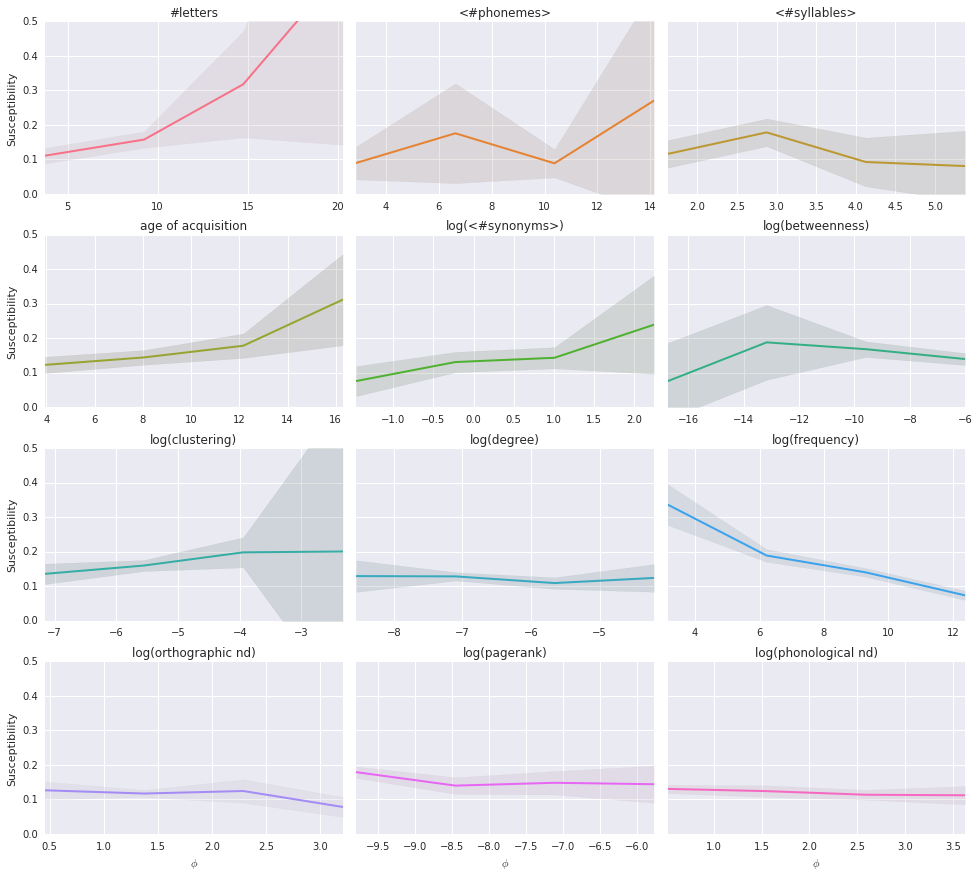

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

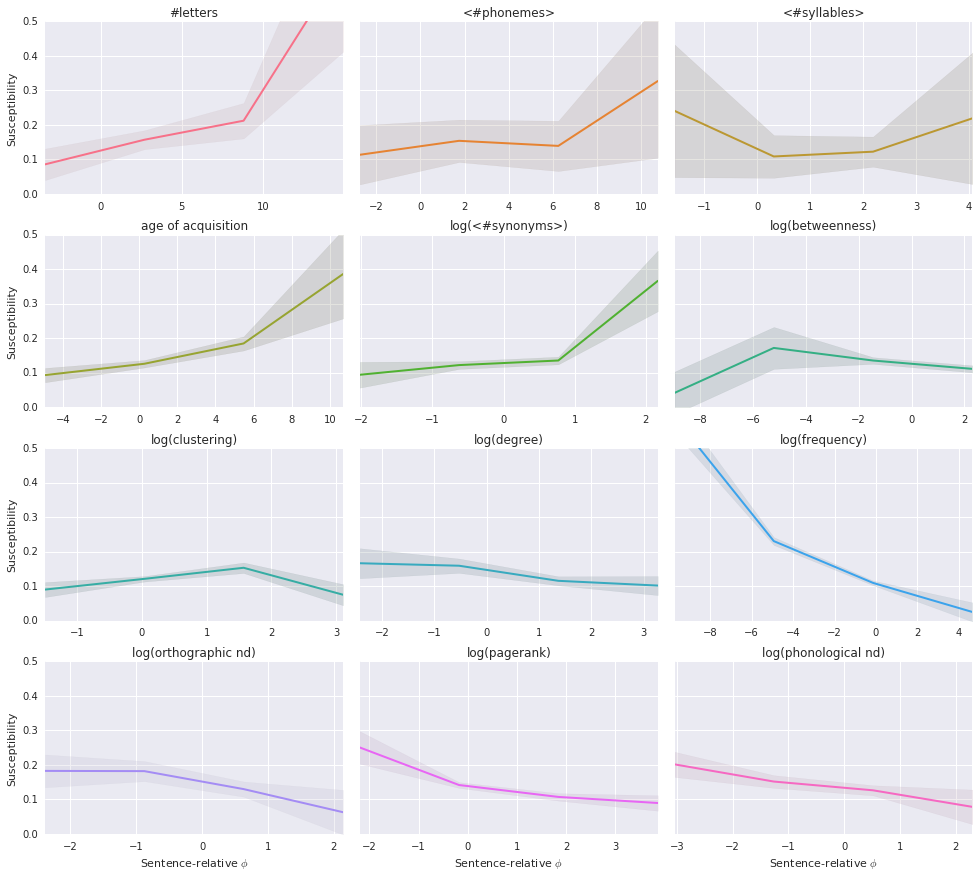

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

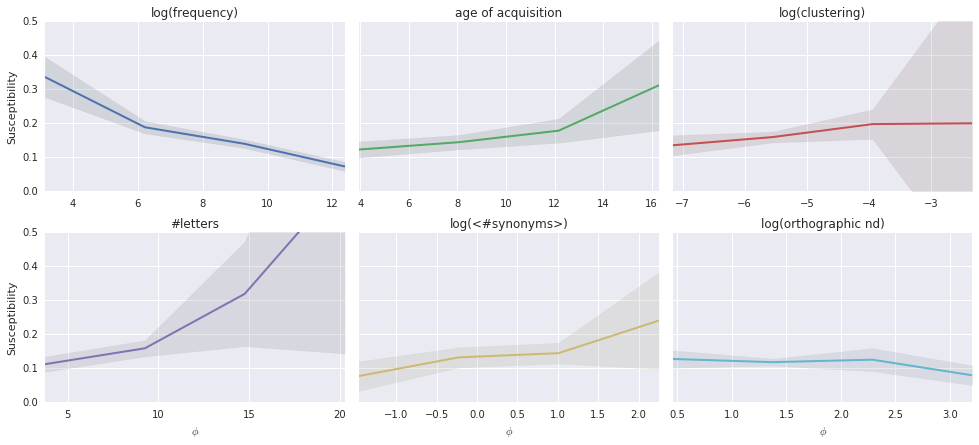

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

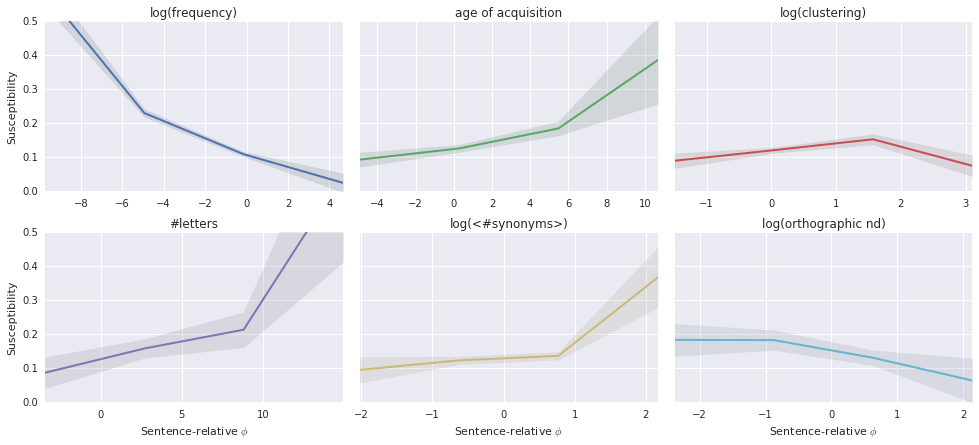

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

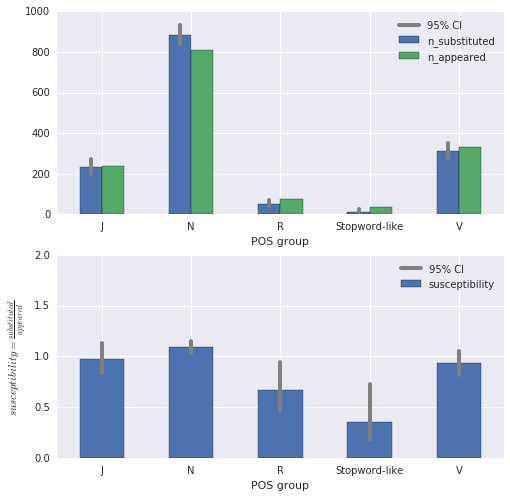

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['N', 'R', 'Stopword-like']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

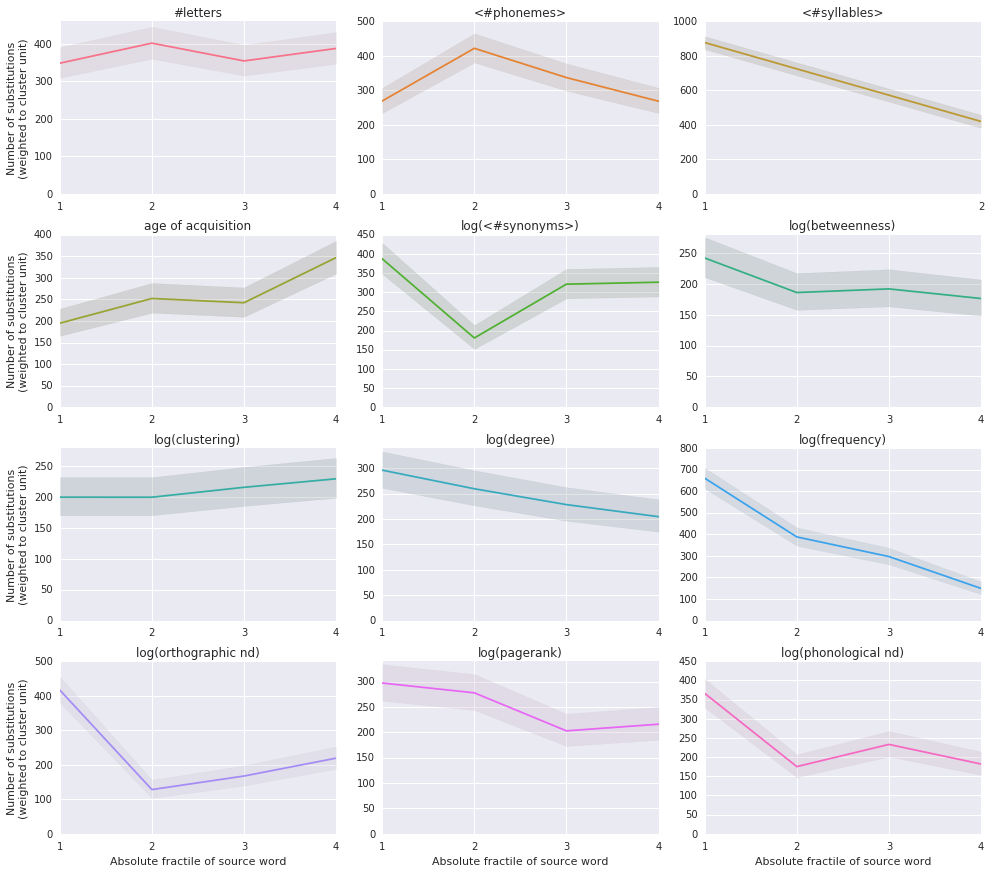

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

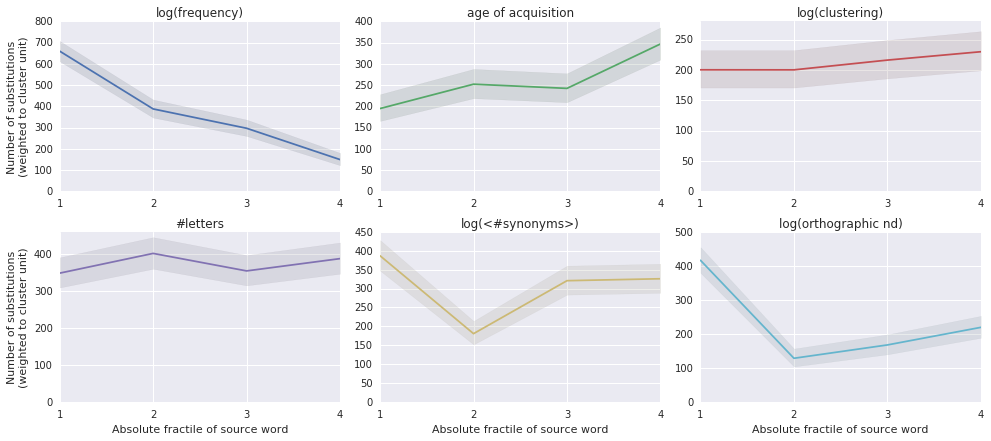

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (   85 of 57703) |                    | Elapsed Time: 0:00:01 ETA:  0:11:18

  0% (  175 of 57703) |                    | Elapsed Time: 0:00:02 ETA:  0:10:41

  0% (  261 of 57703) |                    | Elapsed Time: 0:00:03 ETA:  0:10:56

  0% (  341 of 57703) |                    | Elapsed Time: 0:00:04 ETA:  0:11:16

  0% (  428 of 57703) |                    | Elapsed Time: 0:00:05 ETA:  0:11:11

  0% (  513 of 57703) |                    | Elapsed Time: 0:00:06 ETA:  0:11:11

  1% (  598 of 57703) |                    | Elapsed Time: 0:00:07 ETA:  0:11:10

  1% (  684 of 57703) |                    | Elapsed Time: 0:00:08 ETA:  0:11:09

  1% (  722 of 57703) |                    | Elapsed Time: 0:00:08 ETA:  0:11:07

  1% (  805 of 57703) |                    | Elapsed Time: 0:00:09 ETA:  0:11:09

  1% (  892 of 57703) |                    | Elapsed Time: 0:00:10 ETA:  0:11:12

  1% (  982 of 57703) |                    | Elapsed Time: 0:00:11 ETA:  0:11:06

  1% ( 1072 of 57703) |                    | Elapsed Time: 0:00:12 ETA:  0:10:56

  2% ( 1162 of 57703) |                    | Elapsed Time: 0:00:13 ETA:  0:10:52

  2% ( 1251 of 57703) |                    | Elapsed Time: 0:00:14 ETA:  0:10:48

  2% ( 1344 of 57703) |                    | Elapsed Time: 0:00:15 ETA:  0:10:40

  2% ( 1443 of 57703) |                    | Elapsed Time: 0:00:16 ETA:  0:10:28

  2% ( 1550 of 57703) |                    | Elapsed Time: 0:00:17 ETA:  0:10:06

  2% ( 1663 of 57703) |                    | Elapsed Time: 0:00:18 ETA:  0:09:44

  3% ( 1745 of 57703) |                    | Elapsed Time: 0:00:19 ETA:  0:09:50

  3% ( 1821 of 57703) |                    | Elapsed Time: 0:00:20 ETA:  0:10:01

  3% ( 1896 of 57703) |                    | Elapsed Time: 0:00:21 ETA:  0:10:12

  3% ( 1973 of 57703) |                    | Elapsed Time: 0:00:22 ETA:  0:10:22

  3% ( 2052 of 57703) |                    | Elapsed Time: 0:00:23 ETA:  0:10:34

  3% ( 2134 of 57703) |                    | Elapsed Time: 0:00:24 ETA:  0:10:47

  3% ( 2164 of 57703) |                    | Elapsed Time: 0:00:24 ETA:  0:10:43

  3% ( 2258 of 57703) |                    | Elapsed Time: 0:00:25 ETA:  0:10:54

  4% ( 2353 of 57703) |                    | Elapsed Time: 0:00:26 ETA:  0:11:10

  4% ( 2435 of 57703) |                    | Elapsed Time: 0:00:27 ETA:  0:11:09

  4% ( 2507 of 57703) |                    | Elapsed Time: 0:00:28 ETA:  0:11:13

  4% ( 2580 of 57703) |                    | Elapsed Time: 0:00:29 ETA:  0:11:14

  4% ( 2664 of 57703) |                    | Elapsed Time: 0:00:30 ETA:  0:11:06

  4% ( 2829 of 57703) |                    | Elapsed Time: 0:00:31 ETA:  0:09:47

  5% ( 2886 of 57703) |#                   | Elapsed Time: 0:00:32 ETA:  0:09:17

  5% ( 3049 of 57703) |#                   | Elapsed Time: 0:00:33 ETA:  0:08:34

  5% ( 3208 of 57703) |#                   | Elapsed Time: 0:00:34 ETA:  0:07:55

  5% ( 3373 of 57703) |#                   | Elapsed Time: 0:00:35 ETA:  0:07:19

  6% ( 3536 of 57703) |#                   | Elapsed Time: 0:00:36 ETA:  0:06:43

  6% ( 3607 of 57703) |#                   | Elapsed Time: 0:00:36 ETA:  0:06:13

  6% ( 3769 of 57703) |#                   | Elapsed Time: 0:00:37 ETA:  0:05:41

  6% ( 3913 of 57703) |#                   | Elapsed Time: 0:00:38 ETA:  0:05:22

  6% ( 4005 of 57703) |#                   | Elapsed Time: 0:00:39 ETA:  0:05:43

  7% ( 4083 of 57703) |#                   | Elapsed Time: 0:00:40 ETA:  0:06:07

  7% ( 4167 of 57703) |#                   | Elapsed Time: 0:00:41 ETA:  0:06:35

  7% ( 4250 of 57703) |#                   | Elapsed Time: 0:00:42 ETA:  0:07:07

  7% ( 4328 of 57703) |#                   | Elapsed Time: 0:00:43 ETA:  0:07:43

  7% ( 4414 of 57703) |#                   | Elapsed Time: 0:00:44 ETA:  0:08:27

  7% ( 4499 of 57703) |#                   | Elapsed Time: 0:00:45 ETA:  0:08:54

  7% ( 4587 of 57703) |#                   | Elapsed Time: 0:00:46 ETA:  0:09:45

  8% ( 4670 of 57703) |#                   | Elapsed Time: 0:00:47 ETA:  0:10:36

  8% ( 4750 of 57703) |#                   | Elapsed Time: 0:00:48 ETA:  0:10:45

  8% ( 4837 of 57703) |#                   | Elapsed Time: 0:00:49 ETA:  0:10:36

  8% ( 4927 of 57703) |#                   | Elapsed Time: 0:00:50 ETA:  0:10:29

  8% ( 5018 of 57703) |#                   | Elapsed Time: 0:00:51 ETA:  0:10:21

  8% ( 5050 of 57703) |#                   | Elapsed Time: 0:00:52 ETA:  0:10:18

  8% ( 5136 of 57703) |#                   | Elapsed Time: 0:00:53 ETA:  0:10:18

  9% ( 5226 of 57703) |#                   | Elapsed Time: 0:00:54 ETA:  0:10:13

  9% ( 5315 of 57703) |#                   | Elapsed Time: 0:00:55 ETA:  0:10:11

  9% ( 5400 of 57703) |#                   | Elapsed Time: 0:00:56 ETA:  0:10:08

  9% ( 5486 of 57703) |#                   | Elapsed Time: 0:00:57 ETA:  0:10:02

  9% ( 5574 of 57703) |#                   | Elapsed Time: 0:00:58 ETA:  0:10:00

  9% ( 5679 of 57703) |#                   | Elapsed Time: 0:00:59 ETA:  0:09:46

 10% ( 5771 of 57703) |##                  | Elapsed Time: 0:01:00 ETA:  0:09:55

 10% ( 5850 of 57703) |##                  | Elapsed Time: 0:01:01 ETA:  0:10:00

 10% ( 5928 of 57703) |##                  | Elapsed Time: 0:01:02 ETA:  0:10:10

 10% ( 6008 of 57703) |##                  | Elapsed Time: 0:01:03 ETA:  0:10:18

 10% ( 6098 of 57703) |##                  | Elapsed Time: 0:01:04 ETA:  0:10:12

 10% ( 6205 of 57703) |##                  | Elapsed Time: 0:01:05 ETA:  0:09:51

 10% ( 6292 of 57703) |##                  | Elapsed Time: 0:01:06 ETA:  0:09:51

 11% ( 6377 of 57703) |##                  | Elapsed Time: 0:01:07 ETA:  0:10:10

 11% ( 6470 of 57703) |##                  | Elapsed Time: 0:01:08 ETA:  0:09:57

 11% ( 6492 of 57703) |##                  | Elapsed Time: 0:01:08 ETA:  0:09:52

 11% ( 6635 of 57703) |##                  | Elapsed Time: 0:01:09 ETA:  0:08:57

 11% ( 6774 of 57703) |##                  | Elapsed Time: 0:01:10 ETA:  0:08:13

 11% ( 6881 of 57703) |##                  | Elapsed Time: 0:01:11 ETA:  0:07:54

 12% ( 6986 of 57703) |##                  | Elapsed Time: 0:01:12 ETA:  0:07:43

 12% ( 7071 of 57703) |##                  | Elapsed Time: 0:01:13 ETA:  0:07:56

 12% ( 7162 of 57703) |##                  | Elapsed Time: 0:01:14 ETA:  0:07:52

 12% ( 7213 of 57703) |##                  | Elapsed Time: 0:01:15 ETA:  0:07:44

 12% ( 7301 of 57703) |##                  | Elapsed Time: 0:01:16 ETA:  0:07:47

 12% ( 7395 of 57703) |##                  | Elapsed Time: 0:01:17 ETA:  0:07:53

 12% ( 7484 of 57703) |##                  | Elapsed Time: 0:01:18 ETA:  0:08:27

 13% ( 7573 of 57703) |##                  | Elapsed Time: 0:01:19 ETA:  0:09:03

 13% ( 7665 of 57703) |##                  | Elapsed Time: 0:01:20 ETA:  0:09:14

 13% ( 7756 of 57703) |##                  | Elapsed Time: 0:01:21 ETA:  0:09:25

 13% ( 7849 of 57703) |##                  | Elapsed Time: 0:01:22 ETA:  0:09:18

 13% ( 7935 of 57703) |##                  | Elapsed Time: 0:01:23 ETA:  0:09:16

 13% ( 8026 of 57703) |##                  | Elapsed Time: 0:01:24 ETA:  0:09:14

 14% ( 8116 of 57703) |##                  | Elapsed Time: 0:01:25 ETA:  0:09:11

 14% ( 8207 of 57703) |##                  | Elapsed Time: 0:01:26 ETA:  0:09:13

 14% ( 8298 of 57703) |##                  | Elapsed Time: 0:01:27 ETA:  0:09:10

 14% ( 8389 of 57703) |##                  | Elapsed Time: 0:01:28 ETA:  0:09:08

 14% ( 8481 of 57703) |##                  | Elapsed Time: 0:01:29 ETA:  0:09:07

 14% ( 8570 of 57703) |##                  | Elapsed Time: 0:01:30 ETA:  0:09:07

 15% ( 8656 of 57703) |###                 | Elapsed Time: 0:01:31 ETA:  0:09:08

 15% ( 8747 of 57703) |###                 | Elapsed Time: 0:01:32 ETA:  0:09:08

 15% ( 8837 of 57703) |###                 | Elapsed Time: 0:01:33 ETA:  0:09:07

 15% ( 8929 of 57703) |###                 | Elapsed Time: 0:01:34 ETA:  0:09:04

 15% ( 9019 of 57703) |###                 | Elapsed Time: 0:01:35 ETA:  0:09:04

 15% ( 9109 of 57703) |###                 | Elapsed Time: 0:01:36 ETA:  0:09:04

 15% ( 9201 of 57703) |###                 | Elapsed Time: 0:01:37 ETA:  0:09:02

 16% ( 9307 of 57703) |###                 | Elapsed Time: 0:01:38 ETA:  0:08:50

 16% ( 9377 of 57703) |###                 | Elapsed Time: 0:01:38 ETA:  0:08:41

 16% ( 9481 of 57703) |###                 | Elapsed Time: 0:01:39 ETA:  0:08:29

 16% ( 9581 of 57703) |###                 | Elapsed Time: 0:01:40 ETA:  0:08:22

 16% ( 9681 of 57703) |###                 | Elapsed Time: 0:01:41 ETA:  0:08:14

 16% ( 9780 of 57703) |###                 | Elapsed Time: 0:01:42 ETA:  0:08:08

 17% ( 9880 of 57703) |###                 | Elapsed Time: 0:01:43 ETA:  0:08:00

 17% ( 9979 of 57703) |###                 | Elapsed Time: 0:01:44 ETA:  0:07:52

 17% (10099 of 57703) |###                 | Elapsed Time: 0:01:46 ETA:  0:07:49

 17% (10197 of 57703) |###                 | Elapsed Time: 0:01:47 ETA:  0:07:51

 17% (10291 of 57703) |###                 | Elapsed Time: 0:01:48 ETA:  0:07:57

 18% (10389 of 57703) |###                 | Elapsed Time: 0:01:49 ETA:  0:07:58

 18% (10485 of 57703) |###                 | Elapsed Time: 0:01:50 ETA:  0:08:00

 18% (10582 of 57703) |###                 | Elapsed Time: 0:01:51 ETA:  0:08:00

 18% (10682 of 57703) |###                 | Elapsed Time: 0:01:52 ETA:  0:07:59

 18% (10778 of 57703) |###                 | Elapsed Time: 0:01:53 ETA:  0:08:01

 18% (10820 of 57703) |###                 | Elapsed Time: 0:01:53 ETA:  0:08:03

 18% (10916 of 57703) |###                 | Elapsed Time: 0:01:54 ETA:  0:08:04

 19% (11016 of 57703) |###                 | Elapsed Time: 0:01:55 ETA:  0:08:01

 19% (11113 of 57703) |###                 | Elapsed Time: 0:01:56 ETA:  0:07:58

 19% (11214 of 57703) |###                 | Elapsed Time: 0:01:57 ETA:  0:07:55

 19% (11313 of 57703) |###                 | Elapsed Time: 0:01:58 ETA:  0:07:52

 19% (11412 of 57703) |###                 | Elapsed Time: 0:01:59 ETA:  0:07:50

 19% (11512 of 57703) |###                 | Elapsed Time: 0:02:00 ETA:  0:07:49

 20% (11541 of 57703) |####                | Elapsed Time: 0:02:00 ETA:  0:07:47

 20% (11642 of 57703) |####                | Elapsed Time: 0:02:01 ETA:  0:07:44

 20% (11743 of 57703) |####                | Elapsed Time: 0:02:02 ETA:  0:07:39

 20% (11841 of 57703) |####                | Elapsed Time: 0:02:03 ETA:  0:07:39

 20% (11940 of 57703) |####                | Elapsed Time: 0:02:04 ETA:  0:07:36

 20% (12040 of 57703) |####                | Elapsed Time: 0:02:05 ETA:  0:07:36

 21% (12138 of 57703) |####                | Elapsed Time: 0:02:06 ETA:  0:07:35

 21% (12235 of 57703) |####                | Elapsed Time: 0:02:07 ETA:  0:07:35

 21% (12262 of 57703) |####                | Elapsed Time: 0:02:08 ETA:  0:07:36

 21% (12363 of 57703) |####                | Elapsed Time: 0:02:09 ETA:  0:07:34

 21% (12465 of 57703) |####                | Elapsed Time: 0:02:10 ETA:  0:07:32

 21% (12566 of 57703) |####                | Elapsed Time: 0:02:11 ETA:  0:07:31

 21% (12669 of 57703) |####                | Elapsed Time: 0:02:12 ETA:  0:07:27

 22% (12768 of 57703) |####                | Elapsed Time: 0:02:13 ETA:  0:07:26

 22% (12868 of 57703) |####                | Elapsed Time: 0:02:14 ETA:  0:07:25

 22% (12984 of 57703) |####                | Elapsed Time: 0:02:15 ETA:  0:07:19

 22% (13081 of 57703) |####                | Elapsed Time: 0:02:16 ETA:  0:07:21

 22% (13167 of 57703) |####                | Elapsed Time: 0:02:17 ETA:  0:07:31

 22% (13248 of 57703) |####                | Elapsed Time: 0:02:18 ETA:  0:07:45

 23% (13328 of 57703) |####                | Elapsed Time: 0:02:19 ETA:  0:08:01

 23% (13409 of 57703) |####                | Elapsed Time: 0:02:20 ETA:  0:08:18

 23% (13491 of 57703) |####                | Elapsed Time: 0:02:21 ETA:  0:08:33

 23% (13590 of 57703) |####                | Elapsed Time: 0:02:22 ETA:  0:08:32

 23% (13705 of 57703) |####                | Elapsed Time: 0:02:23 ETA:  0:08:36

 23% (13754 of 57703) |####                | Elapsed Time: 0:02:26 ETA:  0:11:57

 23% (13842 of 57703) |####                | Elapsed Time: 0:02:27 ETA:  0:11:53

 24% (13919 of 57703) |####                | Elapsed Time: 0:02:28 ETA:  0:11:58

 24% (13993 of 57703) |####                | Elapsed Time: 0:02:29 ETA:  0:12:04

 24% (14066 of 57703) |####                | Elapsed Time: 0:02:30 ETA:  0:12:13

 24% (14140 of 57703) |####                | Elapsed Time: 0:02:31 ETA:  0:12:23

 24% (14220 of 57703) |####                | Elapsed Time: 0:02:32 ETA:  0:12:49

 24% (14320 of 57703) |####                | Elapsed Time: 0:02:33 ETA:  0:12:42

 25% (14426 of 57703) |#####               | Elapsed Time: 0:02:34 ETA:  0:08:56

 25% (14528 of 57703) |#####               | Elapsed Time: 0:02:35 ETA:  0:08:41

 25% (14628 of 57703) |#####               | Elapsed Time: 0:02:36 ETA:  0:08:18

 25% (14732 of 57703) |#####               | Elapsed Time: 0:02:37 ETA:  0:07:50

 25% (14835 of 57703) |#####               | Elapsed Time: 0:02:38 ETA:  0:07:25

 25% (14938 of 57703) |#####               | Elapsed Time: 0:02:39 ETA:  0:07:02

 26% (15042 of 57703) |#####               | Elapsed Time: 0:02:40 ETA:  0:06:44

 26% (15148 of 57703) |#####               | Elapsed Time: 0:02:41 ETA:  0:06:42

 26% (15250 of 57703) |#####               | Elapsed Time: 0:02:42 ETA:  0:06:42

 26% (15341 of 57703) |#####               | Elapsed Time: 0:02:43 ETA:  0:06:48

 26% (15417 of 57703) |#####               | Elapsed Time: 0:02:44 ETA:  0:07:05

 26% (15495 of 57703) |#####               | Elapsed Time: 0:02:45 ETA:  0:07:24

 26% (15573 of 57703) |#####               | Elapsed Time: 0:02:46 ETA:  0:07:45

 27% (15662 of 57703) |#####               | Elapsed Time: 0:02:47 ETA:  0:07:56

 27% (15798 of 57703) |#####               | Elapsed Time: 0:02:48 ETA:  0:07:27

 27% (15869 of 57703) |#####               | Elapsed Time: 0:02:49 ETA:  0:07:12

 27% (15963 of 57703) |#####               | Elapsed Time: 0:02:50 ETA:  0:07:13

 27% (16047 of 57703) |#####               | Elapsed Time: 0:02:51 ETA:  0:07:25

 27% (16131 of 57703) |#####               | Elapsed Time: 0:02:52 ETA:  0:07:29

 28% (16217 of 57703) |#####               | Elapsed Time: 0:02:53 ETA:  0:07:20

 28% (16321 of 57703) |#####               | Elapsed Time: 0:02:54 ETA:  0:07:00

 28% (16434 of 57703) |#####               | Elapsed Time: 0:02:55 ETA:  0:06:34

 28% (16525 of 57703) |#####               | Elapsed Time: 0:02:56 ETA:  0:06:32

 28% (16590 of 57703) |#####               | Elapsed Time: 0:02:56 ETA:  0:07:01

 28% (16678 of 57703) |#####               | Elapsed Time: 0:02:57 ETA:  0:07:25

 29% (16769 of 57703) |#####               | Elapsed Time: 0:02:58 ETA:  0:07:27

 29% (16872 of 57703) |#####               | Elapsed Time: 0:02:59 ETA:  0:07:12

 29% (16997 of 57703) |#####               | Elapsed Time: 0:03:00 ETA:  0:06:42

 29% (17120 of 57703) |#####               | Elapsed Time: 0:03:01 ETA:  0:06:17

 29% (17243 of 57703) |#####               | Elapsed Time: 0:03:02 ETA:  0:06:04

 30% (17311 of 57703) |######              | Elapsed Time: 0:03:03 ETA:  0:06:03

 30% (17438 of 57703) |######              | Elapsed Time: 0:03:04 ETA:  0:05:40

 30% (17566 of 57703) |######              | Elapsed Time: 0:03:05 ETA:  0:05:23

 30% (17693 of 57703) |######              | Elapsed Time: 0:03:06 ETA:  0:05:02

 30% (17825 of 57703) |######              | Elapsed Time: 0:03:07 ETA:  0:04:42

 31% (17955 of 57703) |######              | Elapsed Time: 0:03:08 ETA:  0:04:29

 31% (18033 of 57703) |######              | Elapsed Time: 0:03:09 ETA:  0:04:27

 31% (18163 of 57703) |######              | Elapsed Time: 0:03:10 ETA:  0:04:23

 31% (18282 of 57703) |######              | Elapsed Time: 0:03:11 ETA:  0:04:24

 31% (18394 of 57703) |######              | Elapsed Time: 0:03:12 ETA:  0:04:28

 32% (18521 of 57703) |######              | Elapsed Time: 0:03:13 ETA:  0:04:27

 32% (18604 of 57703) |######              | Elapsed Time: 0:03:14 ETA:  0:04:46

 32% (18687 of 57703) |######              | Elapsed Time: 0:03:15 ETA:  0:05:06

 32% (18754 of 57703) |######              | Elapsed Time: 0:03:15 ETA:  0:05:28

 32% (18855 of 57703) |######              | Elapsed Time: 0:03:16 ETA:  0:05:43

 32% (18974 of 57703) |######              | Elapsed Time: 0:03:17 ETA:  0:05:44

 33% (19067 of 57703) |######              | Elapsed Time: 0:03:18 ETA:  0:06:05

 33% (19160 of 57703) |######              | Elapsed Time: 0:03:19 ETA:  0:06:21

 33% (19261 of 57703) |######              | Elapsed Time: 0:03:20 ETA:  0:06:27

 33% (19369 of 57703) |######              | Elapsed Time: 0:03:21 ETA:  0:06:39

 33% (19475 of 57703) |######              | Elapsed Time: 0:03:22 ETA:  0:06:20

 33% (19585 of 57703) |######              | Elapsed Time: 0:03:23 ETA:  0:06:01

 34% (19693 of 57703) |######              | Elapsed Time: 0:03:24 ETA:  0:05:48

 34% (19804 of 57703) |######              | Elapsed Time: 0:03:25 ETA:  0:05:41

 34% (19913 of 57703) |######              | Elapsed Time: 0:03:26 ETA:  0:05:46

 34% (20026 of 57703) |######              | Elapsed Time: 0:03:27 ETA:  0:05:33

 34% (20118 of 57703) |######              | Elapsed Time: 0:03:28 ETA:  0:05:32

 35% (20197 of 57703) |#######             | Elapsed Time: 0:03:29 ETA:  0:05:42

 35% (20280 of 57703) |#######             | Elapsed Time: 0:03:30 ETA:  0:05:56

 35% (20381 of 57703) |#######             | Elapsed Time: 0:03:31 ETA:  0:06:01

 35% (20469 of 57703) |#######             | Elapsed Time: 0:03:32 ETA:  0:06:14

 35% (20549 of 57703) |#######             | Elapsed Time: 0:03:33 ETA:  0:06:33

 35% (20631 of 57703) |#######             | Elapsed Time: 0:03:34 ETA:  0:06:53

 35% (20723 of 57703) |#######             | Elapsed Time: 0:03:35 ETA:  0:07:05

 36% (20833 of 57703) |#######             | Elapsed Time: 0:03:36 ETA:  0:07:07

 36% (20918 of 57703) |#######             | Elapsed Time: 0:03:37 ETA:  0:06:43

 36% (21050 of 57703) |#######             | Elapsed Time: 0:03:38 ETA:  0:06:06

 36% (21191 of 57703) |#######             | Elapsed Time: 0:03:39 ETA:  0:05:27

 36% (21333 of 57703) |#######             | Elapsed Time: 0:03:40 ETA:  0:05:03

 37% (21423 of 57703) |#######             | Elapsed Time: 0:03:41 ETA:  0:05:01

 37% (21511 of 57703) |#######             | Elapsed Time: 0:03:42 ETA:  0:04:55

 37% (21639 of 57703) |#######             | Elapsed Time: 0:03:43 ETA:  0:04:25

 37% (21747 of 57703) |#######             | Elapsed Time: 0:03:44 ETA:  0:04:25

 37% (21830 of 57703) |#######             | Elapsed Time: 0:03:45 ETA:  0:04:51

 37% (21908 of 57703) |#######             | Elapsed Time: 0:03:46 ETA:  0:05:22

 38% (21994 of 57703) |#######             | Elapsed Time: 0:03:47 ETA:  0:05:59

 38% (22069 of 57703) |#######             | Elapsed Time: 0:03:48 ETA:  0:06:52

 38% (22141 of 57703) |#######             | Elapsed Time: 0:03:49 ETA:  0:07:06

 38% (22224 of 57703) |#######             | Elapsed Time: 0:03:50 ETA:  0:07:10

 38% (22327 of 57703) |#######             | Elapsed Time: 0:03:51 ETA:  0:07:19

 38% (22360 of 57703) |#######             | Elapsed Time: 0:03:52 ETA:  0:07:25

 38% (22453 of 57703) |#######             | Elapsed Time: 0:03:53 ETA:  0:07:39

 39% (22552 of 57703) |#######             | Elapsed Time: 0:03:54 ETA:  0:07:23

 39% (22640 of 57703) |#######             | Elapsed Time: 0:03:55 ETA:  0:07:13

 39% (22726 of 57703) |#######             | Elapsed Time: 0:03:56 ETA:  0:07:12

 39% (22816 of 57703) |#######             | Elapsed Time: 0:03:57 ETA:  0:06:57

 39% (22926 of 57703) |#######             | Elapsed Time: 0:03:58 ETA:  0:06:24

 39% (23018 of 57703) |#######             | Elapsed Time: 0:03:59 ETA:  0:06:16

 40% (23082 of 57703) |########            | Elapsed Time: 0:03:59 ETA:  0:06:23

 40% (23179 of 57703) |########            | Elapsed Time: 0:04:00 ETA:  0:06:15

 40% (23272 of 57703) |########            | Elapsed Time: 0:04:01 ETA:  0:06:13

 40% (23364 of 57703) |########            | Elapsed Time: 0:04:02 ETA:  0:06:17

 40% (23449 of 57703) |########            | Elapsed Time: 0:04:03 ETA:  0:06:19

 40% (23536 of 57703) |########            | Elapsed Time: 0:04:04 ETA:  0:06:17

 40% (23644 of 57703) |########            | Elapsed Time: 0:04:05 ETA:  0:06:03

 41% (23764 of 57703) |########            | Elapsed Time: 0:04:06 ETA:  0:05:54

 41% (23803 of 57703) |########            | Elapsed Time: 0:04:07 ETA:  0:05:52

 41% (23888 of 57703) |########            | Elapsed Time: 0:04:08 ETA:  0:05:57

 41% (23996 of 57703) |########            | Elapsed Time: 0:04:09 ETA:  0:05:47

 41% (24100 of 57703) |########            | Elapsed Time: 0:04:10 ETA:  0:05:38

 41% (24194 of 57703) |########            | Elapsed Time: 0:04:11 ETA:  0:05:35

 42% (24281 of 57703) |########            | Elapsed Time: 0:04:12 ETA:  0:05:33

 42% (24360 of 57703) |########            | Elapsed Time: 0:04:13 ETA:  0:05:38

 42% (24447 of 57703) |########            | Elapsed Time: 0:04:14 ETA:  0:05:52

 42% (24524 of 57703) |########            | Elapsed Time: 0:04:15 ETA:  0:06:22

 42% (24605 of 57703) |########            | Elapsed Time: 0:04:16 ETA:  0:06:29

 42% (24685 of 57703) |########            | Elapsed Time: 0:04:17 ETA:  0:06:33

 42% (24761 of 57703) |########            | Elapsed Time: 0:04:18 ETA:  0:07:00

 43% (24836 of 57703) |########            | Elapsed Time: 0:04:19 ETA:  0:07:26

 43% (24909 of 57703) |########            | Elapsed Time: 0:04:20 ETA:  0:07:45

 43% (24983 of 57703) |########            | Elapsed Time: 0:04:21 ETA:  0:07:57

 43% (25058 of 57703) |########            | Elapsed Time: 0:04:22 ETA:  0:08:01

 43% (25134 of 57703) |########            | Elapsed Time: 0:04:23 ETA:  0:08:13

 43% (25217 of 57703) |########            | Elapsed Time: 0:04:24 ETA:  0:08:09

 43% (25246 of 57703) |########            | Elapsed Time: 0:04:24 ETA:  0:08:07

 43% (25330 of 57703) |########            | Elapsed Time: 0:04:25 ETA:  0:08:01

 44% (25416 of 57703) |########            | Elapsed Time: 0:04:26 ETA:  0:07:48

 44% (25532 of 57703) |########            | Elapsed Time: 0:04:27 ETA:  0:07:05

 44% (25645 of 57703) |########            | Elapsed Time: 0:04:28 ETA:  0:06:26

 44% (25760 of 57703) |########            | Elapsed Time: 0:04:29 ETA:  0:05:51

 44% (25869 of 57703) |########            | Elapsed Time: 0:04:30 ETA:  0:05:23

 45% (25967 of 57703) |#########           | Elapsed Time: 0:04:31 ETA:  0:04:54

 45% (26064 of 57703) |#########           | Elapsed Time: 0:04:32 ETA:  0:04:54

 45% (26162 of 57703) |#########           | Elapsed Time: 0:04:33 ETA:  0:04:44

 45% (26254 of 57703) |#########           | Elapsed Time: 0:04:34 ETA:  0:04:39

 45% (26347 of 57703) |#########           | Elapsed Time: 0:04:35 ETA:  0:04:54

 45% (26431 of 57703) |#########           | Elapsed Time: 0:04:36 ETA:  0:05:13

 45% (26514 of 57703) |#########           | Elapsed Time: 0:04:37 ETA:  0:05:38

 46% (26600 of 57703) |#########           | Elapsed Time: 0:04:38 ETA:  0:05:56

 46% (26688 of 57703) |#########           | Elapsed Time: 0:04:39 ETA:  0:06:04

 46% (26846 of 57703) |#########           | Elapsed Time: 0:04:40 ETA:  0:05:13

 46% (27039 of 57703) |#########           | Elapsed Time: 0:04:41 ETA:  0:04:07

 47% (27133 of 57703) |#########           | Elapsed Time: 0:04:42 ETA:  0:04:05

 47% (27226 of 57703) |#########           | Elapsed Time: 0:04:43 ETA:  0:04:04

 47% (27303 of 57703) |#########           | Elapsed Time: 0:04:44 ETA:  0:04:07

 47% (27380 of 57703) |#########           | Elapsed Time: 0:04:45 ETA:  0:04:10

 47% (27409 of 57703) |#########           | Elapsed Time: 0:04:46 ETA:  0:04:03

 47% (27486 of 57703) |#########           | Elapsed Time: 0:04:47 ETA:  0:04:08

 47% (27584 of 57703) |#########           | Elapsed Time: 0:04:48 ETA:  0:04:13

 47% (27677 of 57703) |#########           | Elapsed Time: 0:04:49 ETA:  0:04:54

 48% (27762 of 57703) |#########           | Elapsed Time: 0:04:50 ETA:  0:06:20

 48% (27825 of 57703) |#########           | Elapsed Time: 0:04:51 ETA:  0:06:50

 48% (27943 of 57703) |#########           | Elapsed Time: 0:04:52 ETA:  0:06:24

 48% (28075 of 57703) |#########           | Elapsed Time: 0:04:53 ETA:  0:05:35

 48% (28131 of 57703) |#########           | Elapsed Time: 0:04:53 ETA:  0:05:09

 48% (28249 of 57703) |#########           | Elapsed Time: 0:04:54 ETA:  0:04:47

 49% (28338 of 57703) |#########           | Elapsed Time: 0:04:55 ETA:  0:04:38

 49% (28448 of 57703) |#########           | Elapsed Time: 0:04:56 ETA:  0:04:29

 49% (28538 of 57703) |#########           | Elapsed Time: 0:04:57 ETA:  0:04:30

 49% (28625 of 57703) |#########           | Elapsed Time: 0:04:58 ETA:  0:04:28

 49% (28709 of 57703) |#########           | Elapsed Time: 0:04:59 ETA:  0:04:14

 49% (28810 of 57703) |#########           | Elapsed Time: 0:05:00 ETA:  0:04:23

 50% (28852 of 57703) |##########          | Elapsed Time: 0:05:01 ETA:  0:04:44

 50% (28954 of 57703) |##########          | Elapsed Time: 0:05:02 ETA:  0:04:49

 50% (29049 of 57703) |##########          | Elapsed Time: 0:05:03 ETA:  0:05:05

 50% (29158 of 57703) |##########          | Elapsed Time: 0:05:04 ETA:  0:04:49

 50% (29241 of 57703) |##########          | Elapsed Time: 0:05:05 ETA:  0:05:09

 50% (29336 of 57703) |##########          | Elapsed Time: 0:05:06 ETA:  0:05:04

 50% (29408 of 57703) |##########          | Elapsed Time: 0:05:07 ETA:  0:05:15

 51% (29477 of 57703) |##########          | Elapsed Time: 0:05:08 ETA:  0:05:26

 51% (29573 of 57703) |##########          | Elapsed Time: 0:05:09 ETA:  0:05:43

 51% (29661 of 57703) |##########          | Elapsed Time: 0:05:10 ETA:  0:05:56

 51% (29741 of 57703) |##########          | Elapsed Time: 0:05:11 ETA:  0:06:09

 51% (29827 of 57703) |##########          | Elapsed Time: 0:05:12 ETA:  0:06:31

 51% (29915 of 57703) |##########          | Elapsed Time: 0:05:13 ETA:  0:06:25

 51% (29999 of 57703) |##########          | Elapsed Time: 0:05:14 ETA:  0:06:36

 52% (30085 of 57703) |##########          | Elapsed Time: 0:05:15 ETA:  0:06:20

 52% (30171 of 57703) |##########          | Elapsed Time: 0:05:16 ETA:  0:06:01

 52% (30260 of 57703) |##########          | Elapsed Time: 0:05:17 ETA:  0:05:56

 52% (30295 of 57703) |##########          | Elapsed Time: 0:05:17 ETA:  0:05:55

 52% (30386 of 57703) |##########          | Elapsed Time: 0:05:18 ETA:  0:05:51

 52% (30478 of 57703) |##########          | Elapsed Time: 0:05:19 ETA:  0:05:39

 52% (30571 of 57703) |##########          | Elapsed Time: 0:05:20 ETA:  0:05:33

 53% (30664 of 57703) |##########          | Elapsed Time: 0:05:21 ETA:  0:05:27

 53% (30756 of 57703) |##########          | Elapsed Time: 0:05:22 ETA:  0:05:19

 53% (30840 of 57703) |##########          | Elapsed Time: 0:05:23 ETA:  0:05:20

 53% (30951 of 57703) |##########          | Elapsed Time: 0:05:24 ETA:  0:04:58

 53% (31016 of 57703) |##########          | Elapsed Time: 0:05:25 ETA:  0:04:44

 53% (31111 of 57703) |##########          | Elapsed Time: 0:05:26 ETA:  0:04:42

 54% (31184 of 57703) |##########          | Elapsed Time: 0:05:27 ETA:  0:04:55

 54% (31296 of 57703) |##########          | Elapsed Time: 0:05:28 ETA:  0:04:38

 54% (31390 of 57703) |##########          | Elapsed Time: 0:05:29 ETA:  0:04:36

 54% (31481 of 57703) |##########          | Elapsed Time: 0:05:30 ETA:  0:04:37

 54% (31548 of 57703) |##########          | Elapsed Time: 0:05:31 ETA:  0:04:56

 54% (31618 of 57703) |##########          | Elapsed Time: 0:05:32 ETA:  0:05:06

 54% (31710 of 57703) |##########          | Elapsed Time: 0:05:33 ETA:  0:05:22

 55% (31737 of 57703) |###########         | Elapsed Time: 0:05:33 ETA:  0:05:35

 55% (31834 of 57703) |###########         | Elapsed Time: 0:05:34 ETA:  0:05:32

 55% (31917 of 57703) |###########         | Elapsed Time: 0:05:35 ETA:  0:05:22

 55% (32002 of 57703) |###########         | Elapsed Time: 0:05:36 ETA:  0:05:46

 55% (32083 of 57703) |###########         | Elapsed Time: 0:05:37 ETA:  0:05:58

 55% (32122 of 57703) |###########         | Elapsed Time: 0:05:40 ETA:  0:10:17

 55% (32197 of 57703) |###########         | Elapsed Time: 0:05:41 ETA:  0:10:03

 55% (32273 of 57703) |###########         | Elapsed Time: 0:05:42 ETA:  0:09:53

 56% (32351 of 57703) |###########         | Elapsed Time: 0:05:43 ETA:  0:10:12

 56% (32432 of 57703) |###########         | Elapsed Time: 0:05:44 ETA:  0:09:56

 56% (32458 of 57703) |###########         | Elapsed Time: 0:05:45 ETA:  0:10:42

 56% (32552 of 57703) |###########         | Elapsed Time: 0:05:46 ETA:  0:10:24

 56% (32632 of 57703) |###########         | Elapsed Time: 0:05:47 ETA:  0:10:31

 56% (32711 of 57703) |###########         | Elapsed Time: 0:05:48 ETA:  0:10:34

 56% (32792 of 57703) |###########         | Elapsed Time: 0:05:49 ETA:  0:06:15

 56% (32872 of 57703) |###########         | Elapsed Time: 0:05:50 ETA:  0:06:08

 57% (32950 of 57703) |###########         | Elapsed Time: 0:05:51 ETA:  0:06:05

 57% (33031 of 57703) |###########         | Elapsed Time: 0:05:52 ETA:  0:06:01

 57% (33180 of 57703) |###########         | Elapsed Time: 0:05:53 ETA:  0:04:59

 57% (33290 of 57703) |###########         | Elapsed Time: 0:05:54 ETA:  0:04:43

 57% (33397 of 57703) |###########         | Elapsed Time: 0:05:55 ETA:  0:04:19

 58% (33507 of 57703) |###########         | Elapsed Time: 0:05:56 ETA:  0:03:53

 58% (33600 of 57703) |###########         | Elapsed Time: 0:05:57 ETA:  0:03:44

 58% (33712 of 57703) |###########         | Elapsed Time: 0:05:58 ETA:  0:03:21

 58% (33806 of 57703) |###########         | Elapsed Time: 0:05:59 ETA:  0:03:09

 58% (33901 of 57703) |###########         | Elapsed Time: 0:06:00 ETA:  0:02:50

 58% (34002 of 57703) |###########         | Elapsed Time: 0:06:01 ETA:  0:03:09

 59% (34101 of 57703) |###########         | Elapsed Time: 0:06:02 ETA:  0:03:14

 59% (34189 of 57703) |###########         | Elapsed Time: 0:06:03 ETA:  0:03:27

 59% (34288 of 57703) |###########         | Elapsed Time: 0:06:04 ETA:  0:03:31

 59% (34388 of 57703) |###########         | Elapsed Time: 0:06:05 ETA:  0:03:37

 59% (34469 of 57703) |###########         | Elapsed Time: 0:06:06 ETA:  0:03:44

 60% (34622 of 57703) |############        | Elapsed Time: 0:06:07 ETA:  0:03:17

 60% (34717 of 57703) |############        | Elapsed Time: 0:06:08 ETA:  0:03:26

 60% (34812 of 57703) |############        | Elapsed Time: 0:06:09 ETA:  0:03:29

 60% (34902 of 57703) |############        | Elapsed Time: 0:06:10 ETA:  0:03:35

 60% (35030 of 57703) |############        | Elapsed Time: 0:06:11 ETA:  0:03:06

 60% (35153 of 57703) |############        | Elapsed Time: 0:06:12 ETA:  0:02:51

 61% (35250 of 57703) |############        | Elapsed Time: 0:06:13 ETA:  0:02:51

 61% (35344 of 57703) |############        | Elapsed Time: 0:06:14 ETA:  0:02:39

 61% (35450 of 57703) |############        | Elapsed Time: 0:06:15 ETA:  0:03:02

 61% (35535 of 57703) |############        | Elapsed Time: 0:06:16 ETA:  0:03:12

 61% (35623 of 57703) |############        | Elapsed Time: 0:06:17 ETA:  0:03:16

 61% (35727 of 57703) |############        | Elapsed Time: 0:06:18 ETA:  0:03:09

 62% (35839 of 57703) |############        | Elapsed Time: 0:06:19 ETA:  0:02:55

 62% (35933 of 57703) |############        | Elapsed Time: 0:06:20 ETA:  0:03:15

 62% (36037 of 57703) |############        | Elapsed Time: 0:06:21 ETA:  0:03:26

 62% (36065 of 57703) |############        | Elapsed Time: 0:06:21 ETA:  0:03:23

 62% (36165 of 57703) |############        | Elapsed Time: 0:06:22 ETA:  0:03:21

 62% (36274 of 57703) |############        | Elapsed Time: 0:06:23 ETA:  0:03:18

 63% (36354 of 57703) |############        | Elapsed Time: 0:06:24 ETA:  0:03:21

 63% (36455 of 57703) |############        | Elapsed Time: 0:06:25 ETA:  0:03:10

 63% (36573 of 57703) |############        | Elapsed Time: 0:06:26 ETA:  0:03:00

 63% (36692 of 57703) |############        | Elapsed Time: 0:06:27 ETA:  0:02:54

 63% (36786 of 57703) |############        | Elapsed Time: 0:06:28 ETA:  0:02:37

 63% (36889 of 57703) |############        | Elapsed Time: 0:06:29 ETA:  0:02:37

 64% (37011 of 57703) |############        | Elapsed Time: 0:06:30 ETA:  0:02:26

 64% (37119 of 57703) |############        | Elapsed Time: 0:06:31 ETA:  0:02:20

 64% (37206 of 57703) |############        | Elapsed Time: 0:06:32 ETA:  0:02:32

 64% (37310 of 57703) |############        | Elapsed Time: 0:06:33 ETA:  0:02:18

 64% (37417 of 57703) |############        | Elapsed Time: 0:06:34 ETA:  0:02:13

 65% (37507 of 57703) |#############       | Elapsed Time: 0:06:35 ETA:  0:02:19

 65% (37604 of 57703) |#############       | Elapsed Time: 0:06:36 ETA:  0:02:31

 65% (37694 of 57703) |#############       | Elapsed Time: 0:06:37 ETA:  0:02:48

 65% (37786 of 57703) |#############       | Elapsed Time: 0:06:38 ETA:  0:02:54

 65% (37879 of 57703) |#############       | Elapsed Time: 0:06:39 ETA:  0:03:13

 65% (37976 of 57703) |#############       | Elapsed Time: 0:06:40 ETA:  0:03:19

 65% (38075 of 57703) |#############       | Elapsed Time: 0:06:41 ETA:  0:03:10

 66% (38163 of 57703) |#############       | Elapsed Time: 0:06:42 ETA:  0:03:20

 66% (38229 of 57703) |#############       | Elapsed Time: 0:06:43 ETA:  0:03:26

 66% (38333 of 57703) |#############       | Elapsed Time: 0:06:44 ETA:  0:03:24

 66% (38475 of 57703) |#############       | Elapsed Time: 0:06:45 ETA:  0:02:51

 66% (38576 of 57703) |#############       | Elapsed Time: 0:06:46 ETA:  0:02:43

 67% (38668 of 57703) |#############       | Elapsed Time: 0:06:47 ETA:  0:02:42

 67% (38760 of 57703) |#############       | Elapsed Time: 0:06:48 ETA:  0:02:41

 67% (38859 of 57703) |#############       | Elapsed Time: 0:06:49 ETA:  0:02:39

 67% (38950 of 57703) |#############       | Elapsed Time: 0:06:50 ETA:  0:02:42

 67% (39038 of 57703) |#############       | Elapsed Time: 0:06:51 ETA:  0:02:41

 67% (39118 of 57703) |#############       | Elapsed Time: 0:06:52 ETA:  0:02:53

 67% (39213 of 57703) |#############       | Elapsed Time: 0:06:53 ETA:  0:02:58

 68% (39290 of 57703) |#############       | Elapsed Time: 0:06:54 ETA:  0:03:45

 68% (39360 of 57703) |#############       | Elapsed Time: 0:06:55 ETA:  0:04:09

 68% (39498 of 57703) |#############       | Elapsed Time: 0:06:56 ETA:  0:03:31

 68% (39595 of 57703) |#############       | Elapsed Time: 0:06:57 ETA:  0:03:26

 68% (39671 of 57703) |#############       | Elapsed Time: 0:06:58 ETA:  0:03:42

 68% (39803 of 57703) |#############       | Elapsed Time: 0:06:59 ETA:  0:03:11

 69% (39901 of 57703) |#############       | Elapsed Time: 0:07:00 ETA:  0:03:03

 69% (39984 of 57703) |#############       | Elapsed Time: 0:07:01 ETA:  0:03:00

 69% (40051 of 57703) |#############       | Elapsed Time: 0:07:02 ETA:  0:03:20

 69% (40137 of 57703) |#############       | Elapsed Time: 0:07:03 ETA:  0:03:12

 69% (40240 of 57703) |#############       | Elapsed Time: 0:07:04 ETA:  0:02:48

 69% (40323 of 57703) |#############       | Elapsed Time: 0:07:05 ETA:  0:03:27

 70% (40393 of 57703) |##############      | Elapsed Time: 0:07:05 ETA:  0:03:26

 70% (40487 of 57703) |##############      | Elapsed Time: 0:07:06 ETA:  0:03:11

 70% (40578 of 57703) |##############      | Elapsed Time: 0:07:07 ETA:  0:03:43

 70% (40677 of 57703) |##############      | Elapsed Time: 0:07:08 ETA:  0:03:41

 70% (40766 of 57703) |##############      | Elapsed Time: 0:07:09 ETA:  0:03:34

 70% (40852 of 57703) |##############      | Elapsed Time: 0:07:10 ETA:  0:03:17

 70% (40969 of 57703) |##############      | Elapsed Time: 0:07:11 ETA:  0:02:53

 71% (41059 of 57703) |##############      | Elapsed Time: 0:07:12 ETA:  0:03:01

 71% (41114 of 57703) |##############      | Elapsed Time: 0:07:13 ETA:  0:02:46

 71% (41204 of 57703) |##############      | Elapsed Time: 0:07:14 ETA:  0:02:52

 71% (41290 of 57703) |##############      | Elapsed Time: 0:07:15 ETA:  0:02:57

 71% (41381 of 57703) |##############      | Elapsed Time: 0:07:16 ETA:  0:02:57

 71% (41477 of 57703) |##############      | Elapsed Time: 0:07:17 ETA:  0:02:58

 72% (41565 of 57703) |##############      | Elapsed Time: 0:07:18 ETA:  0:02:58

 72% (41652 of 57703) |##############      | Elapsed Time: 0:07:19 ETA:  0:02:56

 72% (41752 of 57703) |##############      | Elapsed Time: 0:07:20 ETA:  0:03:09

 72% (41835 of 57703) |##############      | Elapsed Time: 0:07:21 ETA:  0:02:55

 72% (41946 of 57703) |##############      | Elapsed Time: 0:07:22 ETA:  0:02:47

 72% (42087 of 57703) |##############      | Elapsed Time: 0:07:23 ETA:  0:02:10

 73% (42184 of 57703) |##############      | Elapsed Time: 0:07:24 ETA:  0:02:02

 73% (42307 of 57703) |##############      | Elapsed Time: 0:07:25 ETA:  0:01:41

 73% (42436 of 57703) |##############      | Elapsed Time: 0:07:26 ETA:  0:01:21

 73% (42556 of 57703) |##############      | Elapsed Time: 0:07:27 ETA:  0:00:54

 73% (42661 of 57703) |##############      | Elapsed Time: 0:07:28 ETA:  0:00:50

 74% (42761 of 57703) |##############      | Elapsed Time: 0:07:29 ETA:  0:00:56

 74% (42844 of 57703) |##############      | Elapsed Time: 0:07:30 ETA:  0:01:11

 74% (42923 of 57703) |##############      | Elapsed Time: 0:07:31 ETA:  0:01:49

 74% (43030 of 57703) |##############      | Elapsed Time: 0:07:32 ETA:  0:01:41

 74% (43132 of 57703) |##############      | Elapsed Time: 0:07:33 ETA:  0:01:55

 74% (43226 of 57703) |##############      | Elapsed Time: 0:07:34 ETA:  0:02:19

 75% (43278 of 57703) |###############     | Elapsed Time: 0:07:34 ETA:  0:02:30

 75% (43402 of 57703) |###############     | Elapsed Time: 0:07:35 ETA:  0:02:11

 75% (43489 of 57703) |###############     | Elapsed Time: 0:07:37 ETA:  0:02:23

 75% (43576 of 57703) |###############     | Elapsed Time: 0:07:38 ETA:  0:02:32

 75% (43678 of 57703) |###############     | Elapsed Time: 0:07:39 ETA:  0:02:17

 75% (43780 of 57703) |###############     | Elapsed Time: 0:07:40 ETA:  0:02:00

 76% (43888 of 57703) |###############     | Elapsed Time: 0:07:41 ETA:  0:01:59

 76% (43999 of 57703) |###############     | Elapsed Time: 0:07:42 ETA:  0:01:57

 76% (44110 of 57703) |###############     | Elapsed Time: 0:07:43 ETA:  0:01:45

 76% (44214 of 57703) |###############     | Elapsed Time: 0:07:44 ETA:  0:01:58

 76% (44313 of 57703) |###############     | Elapsed Time: 0:07:45 ETA:  0:01:48

 76% (44425 of 57703) |###############     | Elapsed Time: 0:07:46 ETA:  0:01:30

 77% (44515 of 57703) |###############     | Elapsed Time: 0:07:47 ETA:  0:01:37

 77% (44602 of 57703) |###############     | Elapsed Time: 0:07:48 ETA:  0:01:46

 77% (44685 of 57703) |###############     | Elapsed Time: 0:07:49 ETA:  0:02:03

 77% (44720 of 57703) |###############     | Elapsed Time: 0:07:49 ETA:  0:01:53

 77% (44822 of 57703) |###############     | Elapsed Time: 0:07:50 ETA:  0:01:53

 77% (44909 of 57703) |###############     | Elapsed Time: 0:07:51 ETA:  0:02:09

 77% (45005 of 57703) |###############     | Elapsed Time: 0:07:52 ETA:  0:02:14

 78% (45098 of 57703) |###############     | Elapsed Time: 0:07:53 ETA:  0:02:18

 78% (45188 of 57703) |###############     | Elapsed Time: 0:07:54 ETA:  0:02:34

 78% (45269 of 57703) |###############     | Elapsed Time: 0:07:55 ETA:  0:02:40

 78% (45369 of 57703) |###############     | Elapsed Time: 0:07:56 ETA:  0:02:29

 78% (45442 of 57703) |###############     | Elapsed Time: 0:07:57 ETA:  0:02:16

 78% (45546 of 57703) |###############     | Elapsed Time: 0:07:58 ETA:  0:02:15

 79% (45649 of 57703) |###############     | Elapsed Time: 0:07:59 ETA:  0:02:13

 79% (45735 of 57703) |###############     | Elapsed Time: 0:08:00 ETA:  0:02:13

 79% (45830 of 57703) |###############     | Elapsed Time: 0:08:01 ETA:  0:02:13

 79% (45912 of 57703) |###############     | Elapsed Time: 0:08:02 ETA:  0:02:20

 79% (46029 of 57703) |###############     | Elapsed Time: 0:08:03 ETA:  0:02:00

 79% (46125 of 57703) |###############     | Elapsed Time: 0:08:04 ETA:  0:01:48

 80% (46163 of 57703) |################    | Elapsed Time: 0:08:04 ETA:  0:01:53

 80% (46269 of 57703) |################    | Elapsed Time: 0:08:05 ETA:  0:01:46

 80% (46361 of 57703) |################    | Elapsed Time: 0:08:06 ETA:  0:01:54

 80% (46444 of 57703) |################    | Elapsed Time: 0:08:07 ETA:  0:02:08

 80% (46533 of 57703) |################    | Elapsed Time: 0:08:08 ETA:  0:02:05

 80% (46614 of 57703) |################    | Elapsed Time: 0:08:09 ETA:  0:02:15

 80% (46713 of 57703) |################    | Elapsed Time: 0:08:10 ETA:  0:02:01

 81% (46813 of 57703) |################    | Elapsed Time: 0:08:11 ETA:  0:02:13

 81% (46884 of 57703) |################    | Elapsed Time: 0:08:12 ETA:  0:02:12

 81% (46993 of 57703) |################    | Elapsed Time: 0:08:13 ETA:  0:01:57

 81% (47094 of 57703) |################    | Elapsed Time: 0:08:14 ETA:  0:01:59

 81% (47213 of 57703) |################    | Elapsed Time: 0:08:15 ETA:  0:01:39

 82% (47323 of 57703) |################    | Elapsed Time: 0:08:16 ETA:  0:01:19

 82% (47435 of 57703) |################    | Elapsed Time: 0:08:17 ETA:  0:01:04

 82% (47538 of 57703) |################    | Elapsed Time: 0:08:18 ETA:  0:00:49

 82% (47605 of 57703) |################    | Elapsed Time: 0:08:19 ETA:  0:00:46

 82% (47723 of 57703) |################    | Elapsed Time: 0:08:20 ETA:  0:00:34

 82% (47802 of 57703) |################    | Elapsed Time: 0:08:21 ETA:  0:00:46

 83% (47924 of 57703) |################    | Elapsed Time: 0:08:22 ETA:  0:00:37

 83% (48041 of 57703) |################    | Elapsed Time: 0:08:23 ETA:  0:00:27

 83% (48156 of 57703) |################    | Elapsed Time: 0:08:24 ETA:  0:00:28

 83% (48250 of 57703) |################    | Elapsed Time: 0:08:25 ETA:  0:00:37

 83% (48327 of 57703) |################    | Elapsed Time: 0:08:26 ETA:  0:00:44

 83% (48424 of 57703) |################    | Elapsed Time: 0:08:27 ETA:  0:00:46

 84% (48531 of 57703) |################    | Elapsed Time: 0:08:28 ETA:  0:00:42

 84% (48623 of 57703) |################    | Elapsed Time: 0:08:29 ETA:  0:00:58

 84% (48724 of 57703) |################    | Elapsed Time: 0:08:30 ETA:  0:00:43

 84% (48816 of 57703) |################    | Elapsed Time: 0:08:31 ETA:  0:01:00

 84% (48914 of 57703) |################    | Elapsed Time: 0:08:32 ETA:  0:01:12

 84% (49024 of 57703) |################    | Elapsed Time: 0:08:33 ETA:  0:01:14

 85% (49048 of 57703) |#################   | Elapsed Time: 0:08:33 ETA:  0:01:12

 85% (49152 of 57703) |#################   | Elapsed Time: 0:08:34 ETA:  0:01:07

 85% (49253 of 57703) |#################   | Elapsed Time: 0:08:35 ETA:  0:01:03

 85% (49347 of 57703) |#################   | Elapsed Time: 0:08:36 ETA:  0:01:11

 85% (49459 of 57703) |#################   | Elapsed Time: 0:08:37 ETA:  0:00:56

 85% (49558 of 57703) |#################   | Elapsed Time: 0:08:38 ETA:  0:00:57

 86% (49657 of 57703) |#################   | Elapsed Time: 0:08:39 ETA:  0:00:51

 86% (49769 of 57703) |#################   | Elapsed Time: 0:08:40 ETA:  0:00:48

 86% (49911 of 57703) |#################   | Elapsed Time: 0:08:41 ETA:  0:00:18

 86% (49992 of 57703) |#################   | Elapsed Time: 0:08:42 ETA:  0:00:32

 86% (50088 of 57703) |#################   | Elapsed Time: 0:08:43 ETA:  0:00:35

 86% (50179 of 57703) |#################   | Elapsed Time: 0:08:44 ETA:  0:00:35

 87% (50294 of 57703) |#################   | Elapsed Time: 0:08:45 ETA:  0:00:32

 87% (50394 of 57703) |#################   | Elapsed Time: 0:08:46 ETA:  0:00:30

 87% (50491 of 57703) |#################   | Elapsed Time: 0:08:47 ETA:  0:00:34

 87% (50612 of 57703) |#################   | Elapsed Time: 0:08:48 ETA:  0:00:23

 87% (50761 of 57703) |#################   | Elapsed Time: 0:08:49 ETA:  0:00:17

 88% (50876 of 57703) |#################   | Elapsed Time: 0:08:50 ETA:  0:00:00

 88% (50963 of 57703) |#################   | Elapsed Time: 0:08:51 ETA:  0:00:00

 88% (51070 of 57703) |#################   | Elapsed Time: 0:08:52 ETA:  0:00:00

 88% (51212 of 57703) |#################   | Elapsed Time: 0:08:53 ETA:  0:00:00

 88% (51302 of 57703) |#################   | Elapsed Time: 0:08:54 ETA:  0:00:00

 89% (51402 of 57703) |#################   | Elapsed Time: 0:08:55 ETA:  0:00:00

 89% (51495 of 57703) |#################   | Elapsed Time: 0:08:56 ETA:  0:00:00

 89% (51615 of 57703) |#################   | Elapsed Time: 0:08:57 ETA:  0:00:13

 89% (51717 of 57703) |#################   | Elapsed Time: 0:08:58 ETA:  0:00:21

 89% (51806 of 57703) |#################   | Elapsed Time: 0:08:59 ETA:  0:00:19

 90% (51933 of 57703) |##################  | Elapsed Time: 0:09:00 ETA:  0:00:33

 90% (52055 of 57703) |##################  | Elapsed Time: 0:09:01 ETA:  0:00:20

 90% (52160 of 57703) |##################  | Elapsed Time: 0:09:02 ETA:  0:00:08

 90% (52265 of 57703) |##################  | Elapsed Time: 0:09:03 ETA:  0:00:04

 90% (52366 of 57703) |##################  | Elapsed Time: 0:09:04 ETA:  0:00:00

 90% (52455 of 57703) |##################  | Elapsed Time: 0:09:05 ETA:  0:00:16

 91% (52557 of 57703) |##################  | Elapsed Time: 0:09:06 ETA:  0:00:15

 91% (52654 of 57703) |##################  | Elapsed Time: 0:09:08 ETA:  0:00:25

 91% (52747 of 57703) |##################  | Elapsed Time: 0:09:09 ETA:  0:00:29

 91% (52855 of 57703) |##################  | Elapsed Time: 0:09:10 ETA:  0:00:38

 91% (52963 of 57703) |##################  | Elapsed Time: 0:09:11 ETA:  0:00:35

 92% (53110 of 57703) |##################  | Elapsed Time: 0:09:12 ETA:  0:00:05

 92% (53200 of 57703) |##################  | Elapsed Time: 0:09:13 ETA:  0:00:12

 92% (53308 of 57703) |##################  | Elapsed Time: 0:09:14 ETA:  0:00:00

 92% (53376 of 57703) |##################  | Elapsed Time: 0:09:14 ETA:  0:00:00

 92% (53492 of 57703) |##################  | Elapsed Time: 0:09:15 ETA:  0:00:00

 92% (53599 of 57703) |##################  | Elapsed Time: 0:09:16 ETA:  0:00:00

 93% (53687 of 57703) |##################  | Elapsed Time: 0:09:17 ETA:  0:00:00

 93% (53797 of 57703) |##################  | Elapsed Time: 0:09:18 ETA:  0:00:00

 93% (53897 of 57703) |##################  | Elapsed Time: 0:09:19 ETA:  0:00:00

 93% (54005 of 57703) |##################  | Elapsed Time: 0:09:20 ETA:  0:00:00

 93% (54097 of 57703) |##################  | Elapsed Time: 0:09:21 ETA:  0:00:00

 93% (54202 of 57703) |##################  | Elapsed Time: 0:09:22 ETA:  0:00:00

 94% (54312 of 57703) |##################  | Elapsed Time: 0:09:23 ETA:  0:00:02

 94% (54436 of 57703) |##################  | Elapsed Time: 0:09:24 ETA:  0:00:00

 94% (54500 of 57703) |##################  | Elapsed Time: 0:09:28 ETA:  0:03:21

 94% (54603 of 57703) |##################  | Elapsed Time: 0:09:29 ETA:  0:03:27

 94% (54692 of 57703) |##################  | Elapsed Time: 0:09:30 ETA:  0:03:36

 95% (54818 of 57703) |################### | Elapsed Time: 0:09:31 ETA:  0:03:37

 95% (54935 of 57703) |################### | Elapsed Time: 0:09:32 ETA:  0:02:56

 95% (55024 of 57703) |################### | Elapsed Time: 0:09:33 ETA:  0:03:09

 95% (55129 of 57703) |################### | Elapsed Time: 0:09:34 ETA:  0:03:13

 95% (55212 of 57703) |################### | Elapsed Time: 0:09:35 ETA:  0:03:53

 95% (55314 of 57703) |################### | Elapsed Time: 0:09:36 ETA:  0:00:00

 96% (55411 of 57703) |################### | Elapsed Time: 0:09:37 ETA:  0:00:00

 96% (55505 of 57703) |################### | Elapsed Time: 0:09:38 ETA:  0:00:00

 96% (55540 of 57703) |################### | Elapsed Time: 0:09:38 ETA:  0:00:04

 96% (55647 of 57703) |################### | Elapsed Time: 0:09:39 ETA:  0:00:00

 96% (55747 of 57703) |################### | Elapsed Time: 0:09:40 ETA:  0:00:10

 96% (55853 of 57703) |################### | Elapsed Time: 0:09:41 ETA:  0:00:00

 96% (55948 of 57703) |################### | Elapsed Time: 0:09:42 ETA:  0:00:03

 97% (56046 of 57703) |################### | Elapsed Time: 0:09:43 ETA:  0:00:00

 97% (56165 of 57703) |################### | Elapsed Time: 0:09:44 ETA:  0:00:00

 97% (56261 of 57703) |################### | Elapsed Time: 0:09:45 ETA:  0:00:00

 97% (56371 of 57703) |################### | Elapsed Time: 0:09:46 ETA:  0:00:00

 97% (56469 of 57703) |################### | Elapsed Time: 0:09:47 ETA:  0:00:00

 98% (56581 of 57703) |################### | Elapsed Time: 0:09:48 ETA:  0:00:00

 98% (56694 of 57703) |################### | Elapsed Time: 0:09:49 ETA:  0:00:00

 98% (56812 of 57703) |################### | Elapsed Time: 0:09:50 ETA:  0:00:00

 98% (56909 of 57703) |################### | Elapsed Time: 0:09:51 ETA:  0:00:00

 98% (56982 of 57703) |################### | Elapsed Time: 0:09:52 ETA:  0:00:00

 98% (57090 of 57703) |################### | Elapsed Time: 0:09:53 ETA:  0:00:00

 99% (57192 of 57703) |################### | Elapsed Time: 0:09:54 ETA:  0:00:00

 99% (57294 of 57703) |################### | Elapsed Time: 0:09:55 ETA:  0:00:00

 99% (57398 of 57703) |################### | Elapsed Time: 0:09:56 ETA:  0:00:00

 99% (57516 of 57703) |################### | Elapsed Time: 0:09:57 ETA:  0:00:00

 99% (57619 of 57703) |################### | Elapsed Time: 0:09:58 ETA:  0:00:00

100% (57703 of 57703) |####################| Elapsed Time: 0:09:59 Time: 0:09:59


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

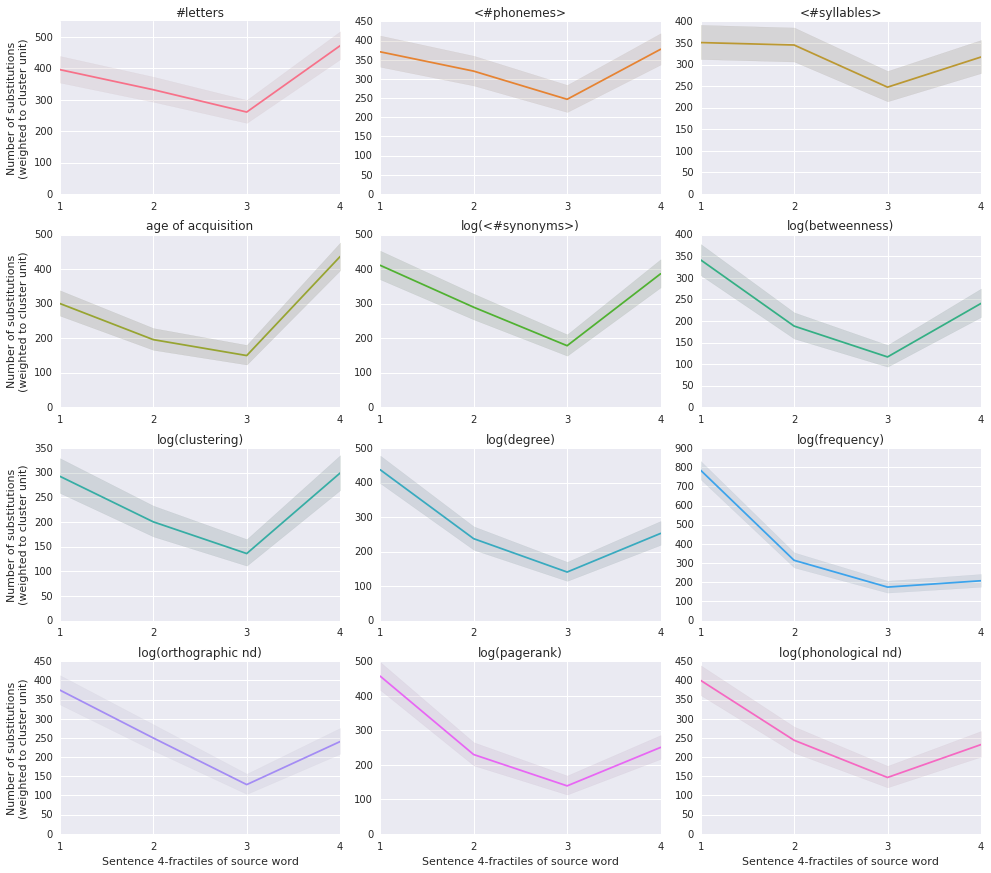

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

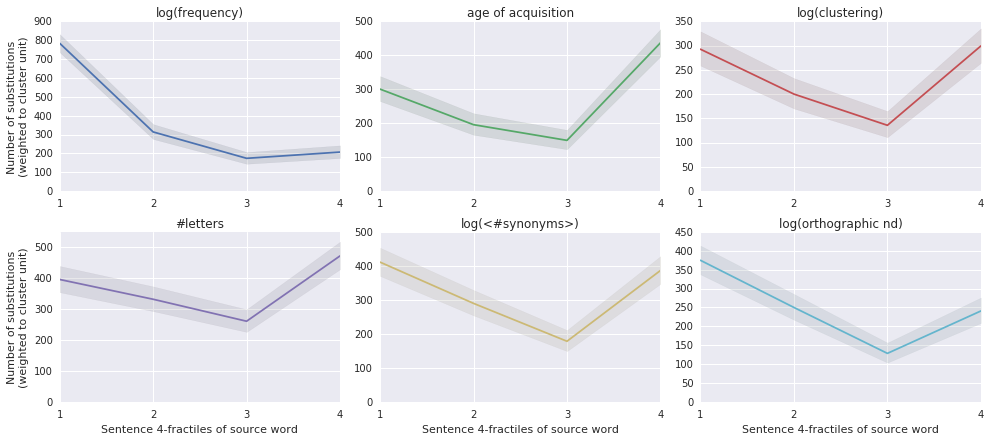

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)